<a href="https://www.kaggle.com/code/scr0ll0/single-play-visualization?scriptVersionId=149074410" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from PIL import Image

from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#Only 1 play
week_1 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv')
play_1 = week_1[(week_1['gameId'] == 2022090800) & (week_1['playId'] == 2648)]

In [3]:
play_1

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
53843,2022090800,2648,38577.0,Bobby Wagner,1,2022-09-08 22:23:37.900000,45.0,LA,left,60.770000,28.060000,0.02,0.03,0.01,67.52,156.35,NaN
53844,2022090800,2648,38577.0,Bobby Wagner,2,2022-09-08 22:23:38.000000,45.0,LA,left,60.790000,28.060000,0.02,0.03,0.02,67.52,150.20,NaN
53845,2022090800,2648,38577.0,Bobby Wagner,3,2022-09-08 22:23:38.099999,45.0,LA,left,60.790000,28.050000,0.02,0.03,0.01,65.90,149.21,NaN
53846,2022090800,2648,38577.0,Bobby Wagner,4,2022-09-08 22:23:38.200000,45.0,LA,left,60.800000,28.050000,0.02,0.02,0.01,65.90,144.66,NaN
53847,2022090800,2648,38577.0,Bobby Wagner,5,2022-09-08 22:23:38.299999,45.0,LA,left,60.810000,28.050000,0.02,0.02,0.01,65.90,141.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55701,2022090800,2648,NaN,football,77,2022-09-08 22:23:45.500000,NaN,football,left,65.449997,33.820000,1.92,3.51,0.19,NaN,NaN,tackle
55702,2022090800,2648,NaN,football,78,2022-09-08 22:23:45.599999,NaN,football,left,65.580002,33.930000,1.58,3.02,0.17,NaN,NaN,NaN
55703,2022090800,2648,NaN,football,79,2022-09-08 22:23:45.700000,NaN,football,left,65.669998,34.000000,1.27,2.73,0.11,NaN,NaN,NaN
55704,2022090800,2648,NaN,football,80,2022-09-08 22:23:45.799999,NaN,football,left,65.769997,34.070000,1.02,2.38,0.12,NaN,NaN,NaN


In [4]:
print(play_1['frameId'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81]


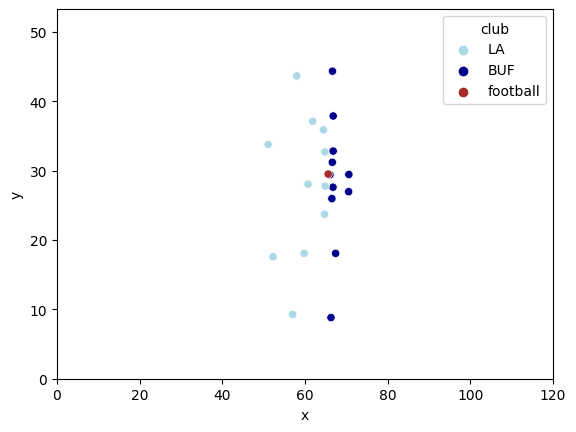

In [5]:
#1 Frame
temp = play_1[play_1['frameId'] == 1]
plot = sns.scatterplot(data=temp, x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'])
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

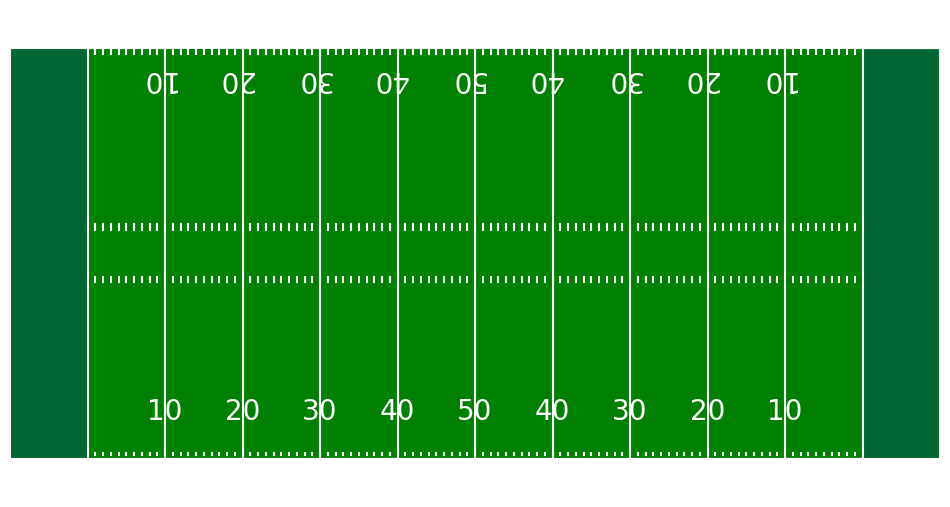

In [6]:
#Sourced from here: https://www.kaggle.com/code/robikscube/nfl-big-data-bowl-plotting-player-position
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='green',zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    return fig, ax
fig, ax = create_football_field()

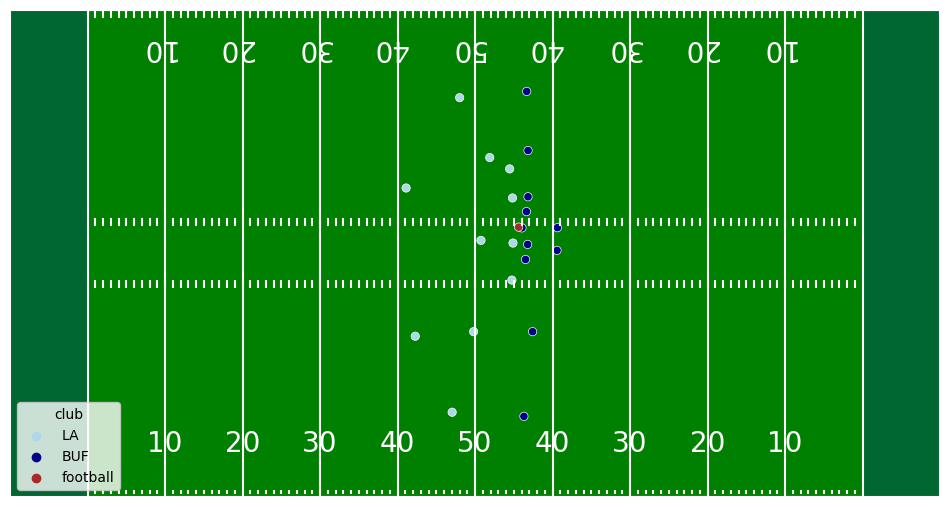

In [7]:
#Football Field
fig, ax = create_football_field()
plot = sns.scatterplot(data=temp, x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'])
plt.xlim(0, 120)
plt.ylim(0, 53.3)
plt.show()

In [8]:
#With Labels and Vectors
def frame(i, orient, metric):
    fig, ax = create_football_field()
    plot = sns.scatterplot(data=play_1[play_1['frameId'] == i], x='x', y='y', hue='club', palette=['lightblue', 'darkblue', 'brown'], legend=False)
    for index, row in play_1[play_1['frameId'] == i].iterrows():
        try:
            ax.text(row['x'], row['y'], int(row['jerseyNumber']), color='white')
            angle = math.radians(row[orient])
            x_length = row[metric] * math.cos(angle)
            y_length = row[metric] * math.sin(angle)
            ax.quiver(row['x'], row['y'], x_length, y_length, angles='xy', scale_units='xy',width=0.004, scale=1, alpha=0.5)
        except ValueError:
            continue
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.savefig(f'frame_{i}.png')
    #plt.show()

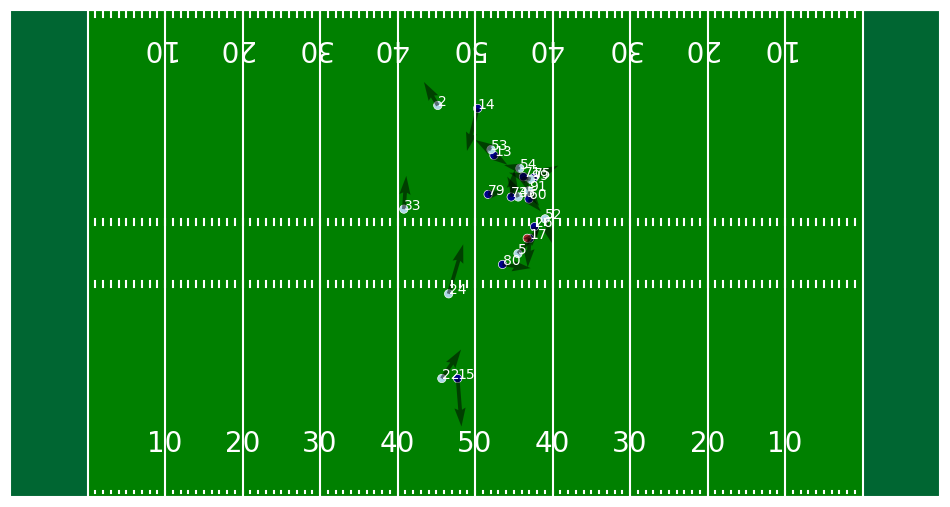

In [9]:
frame(30, 'o', 's')

/tmp/ipykernel_21/706676986.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, figsize=figsize)


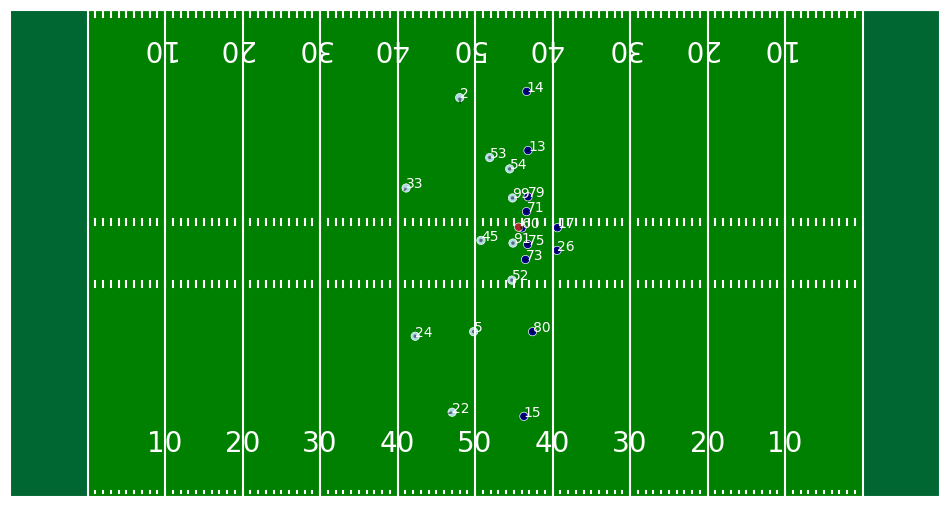

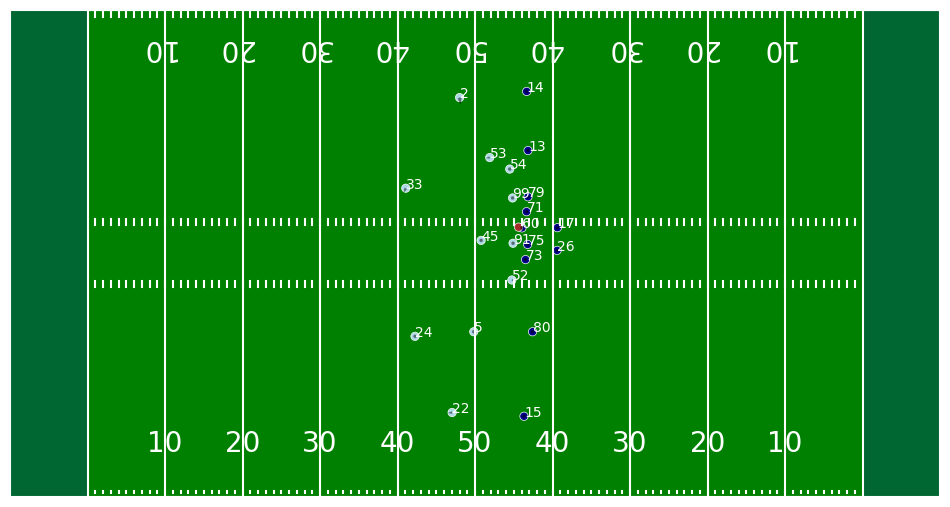

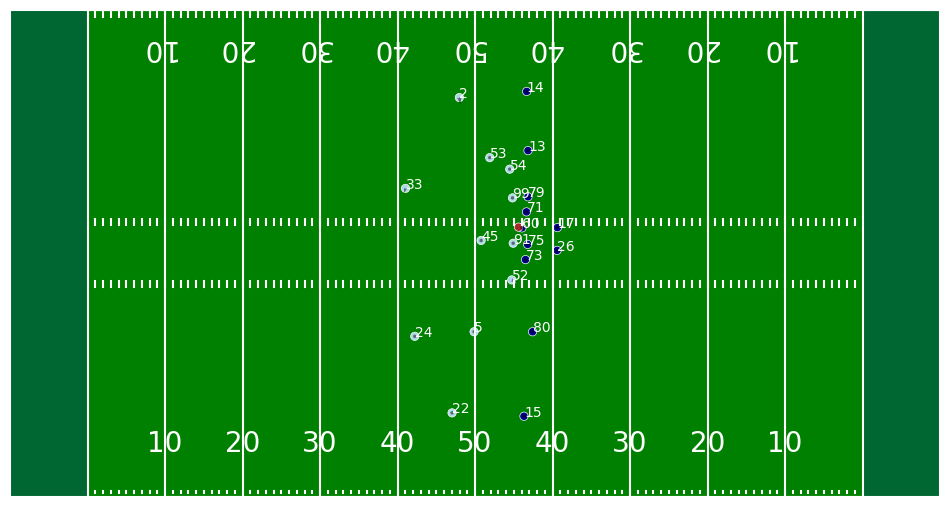

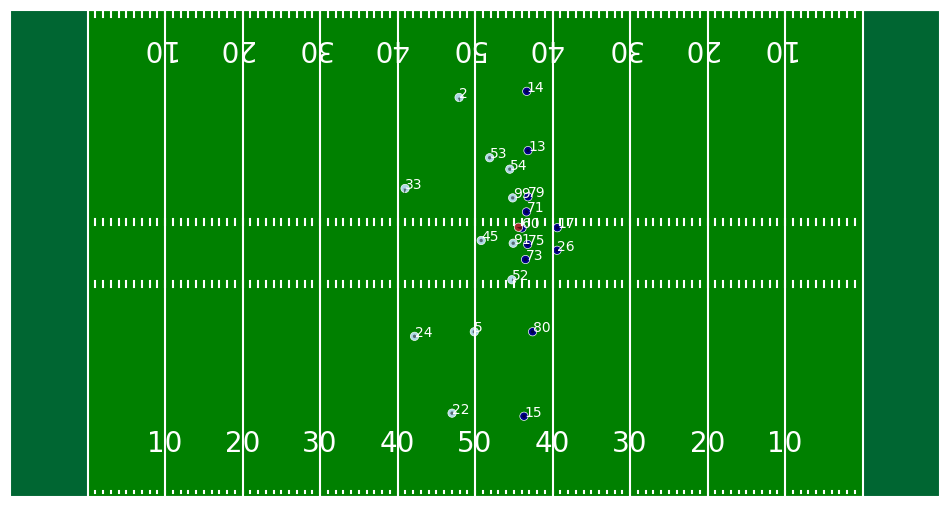

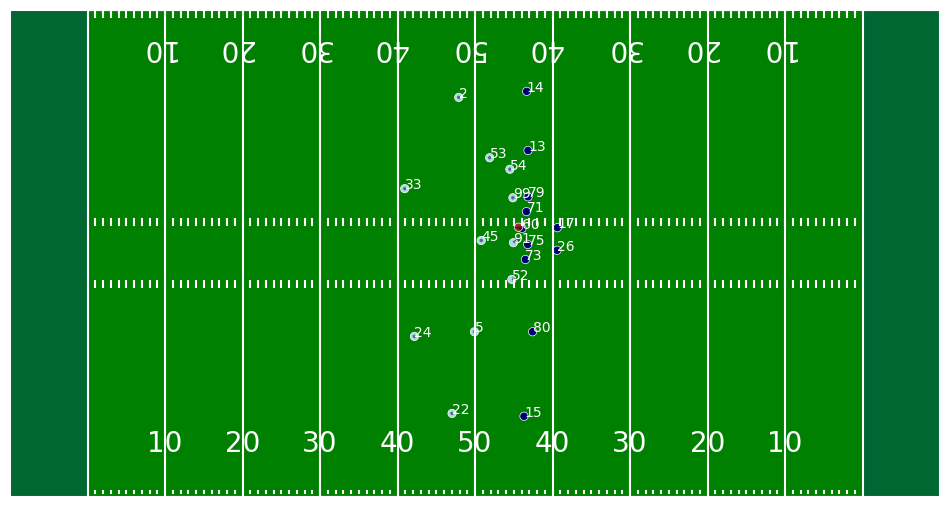

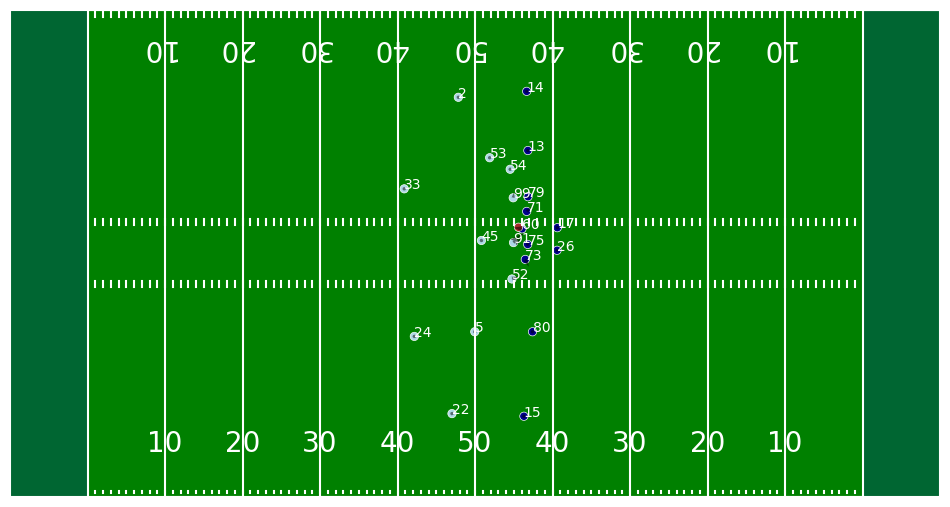

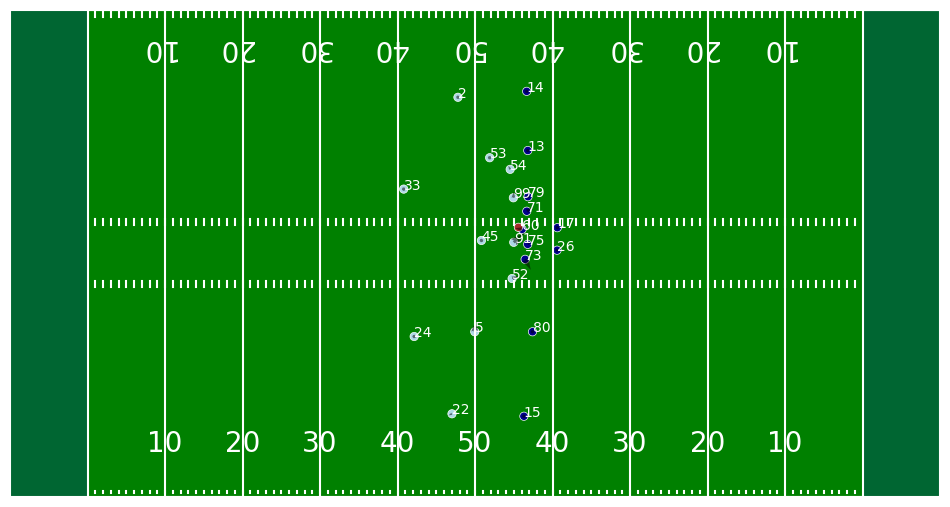

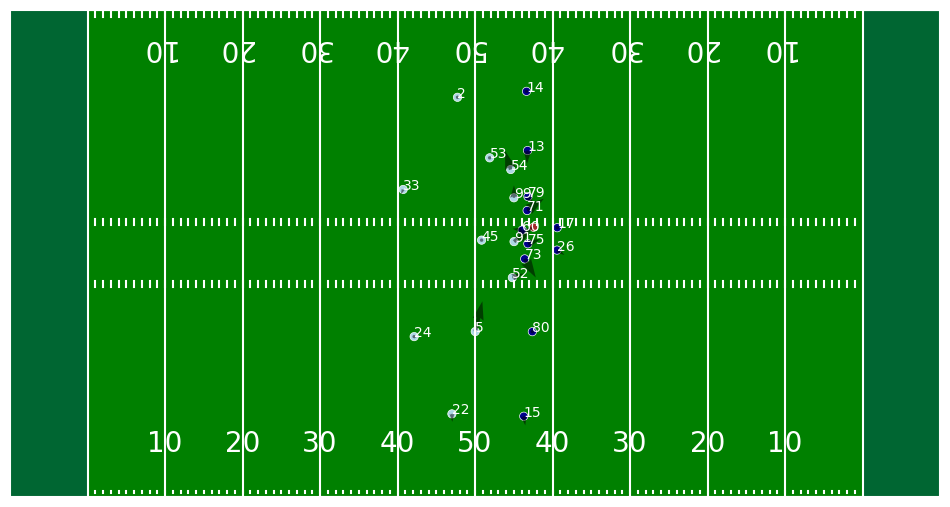

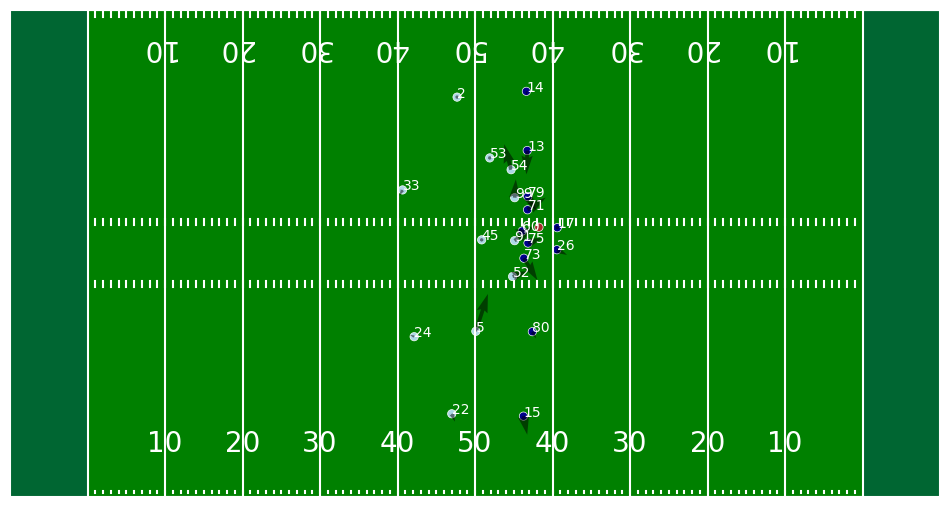

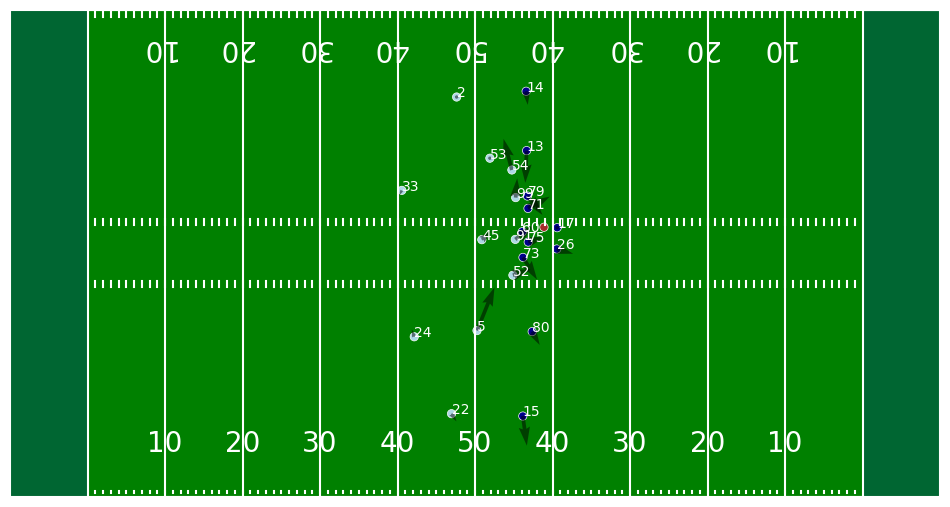

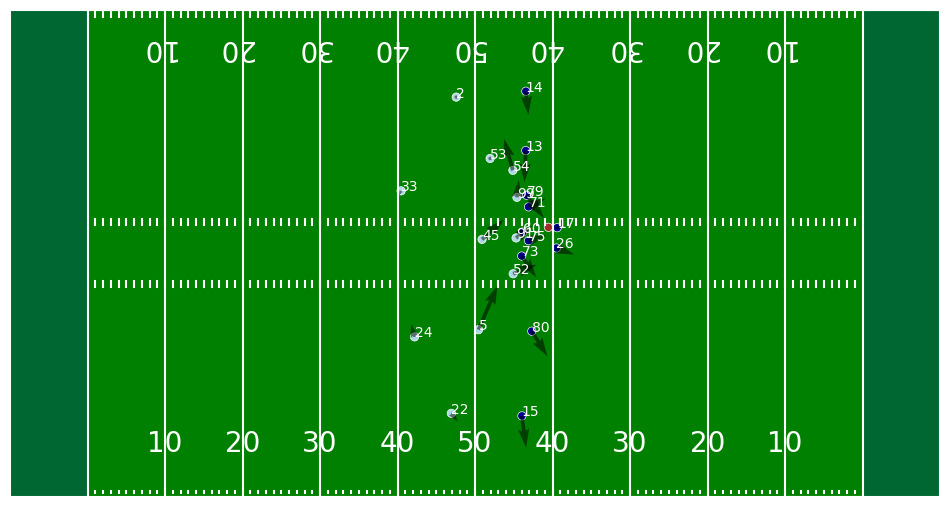

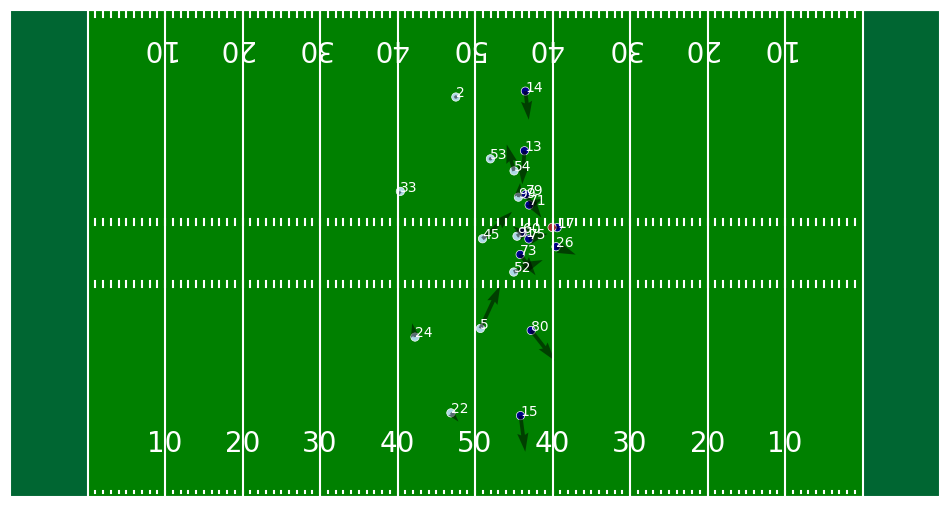

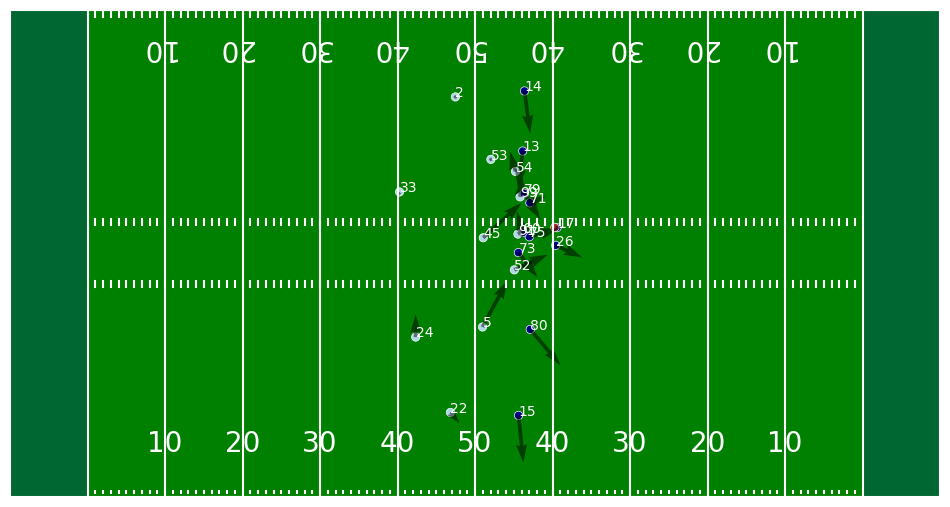

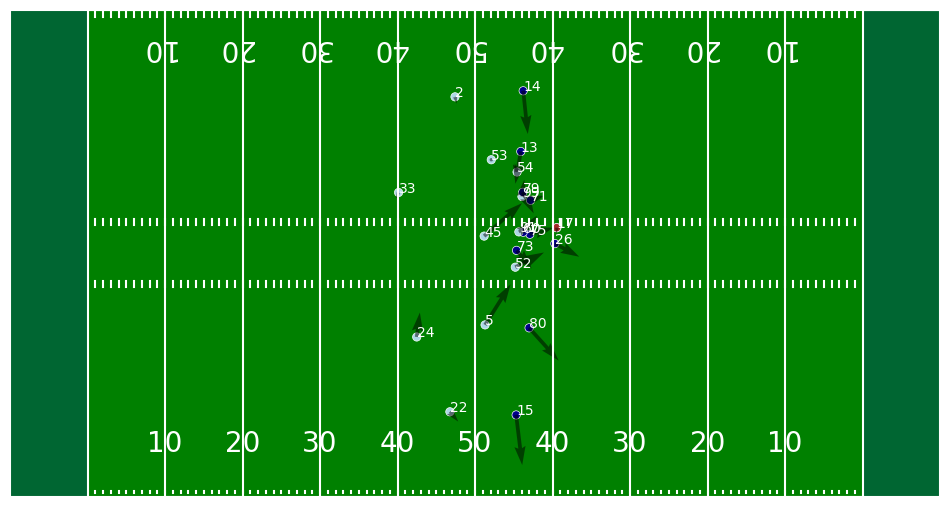

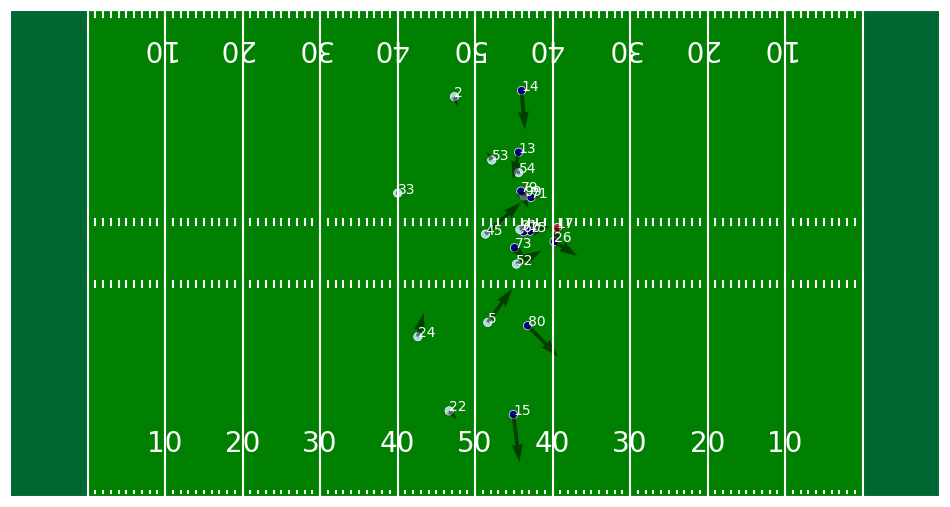

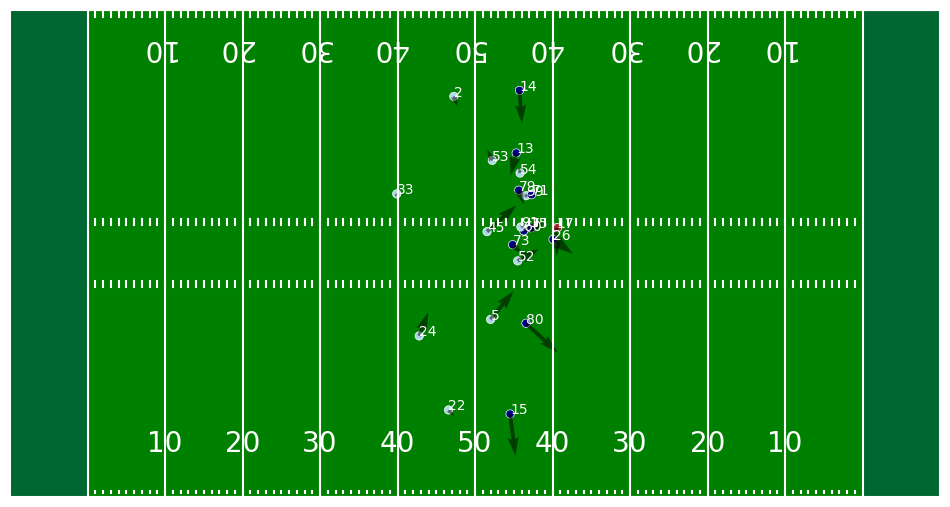

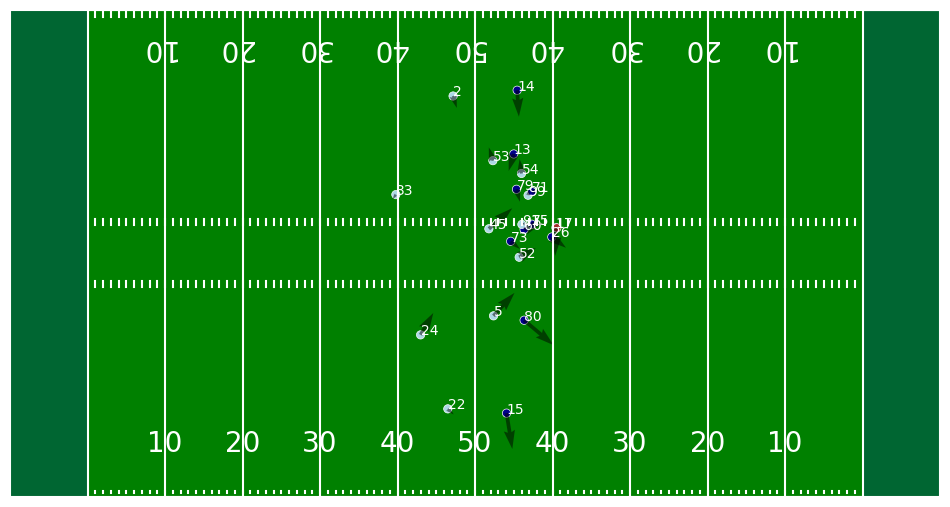

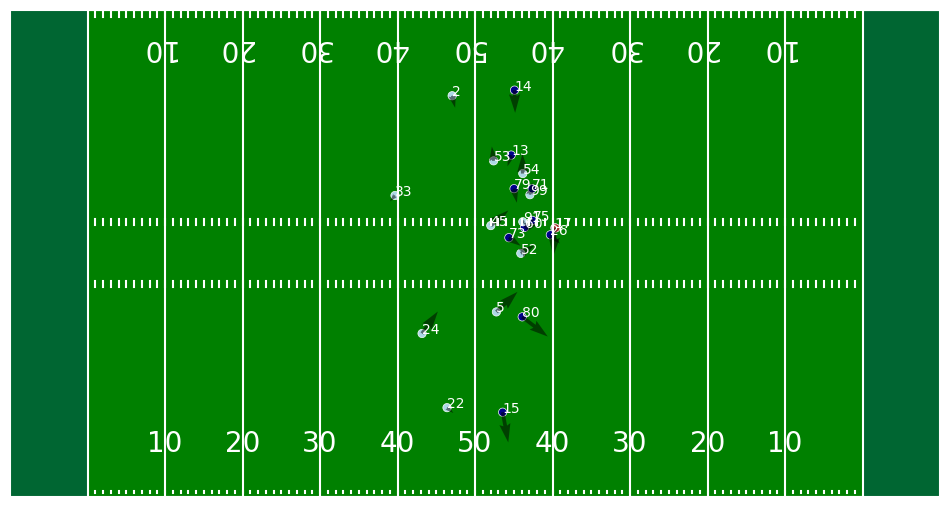

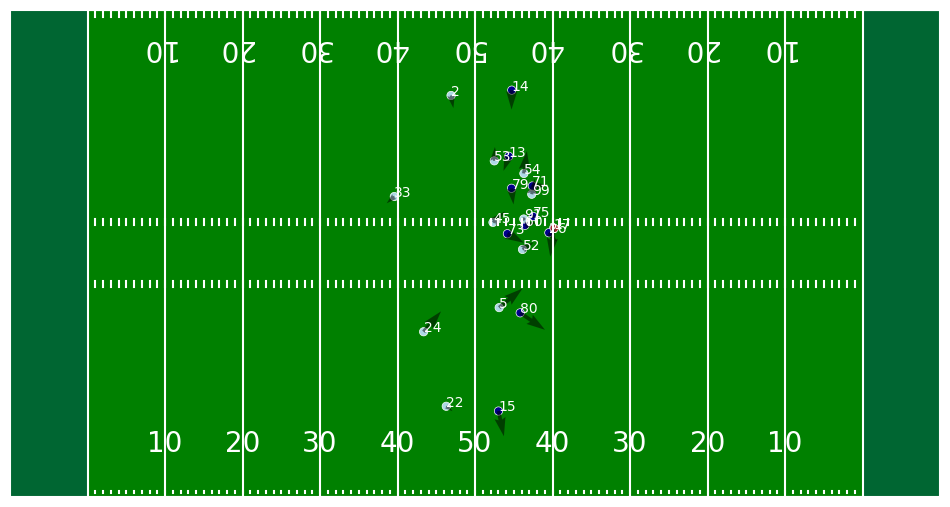

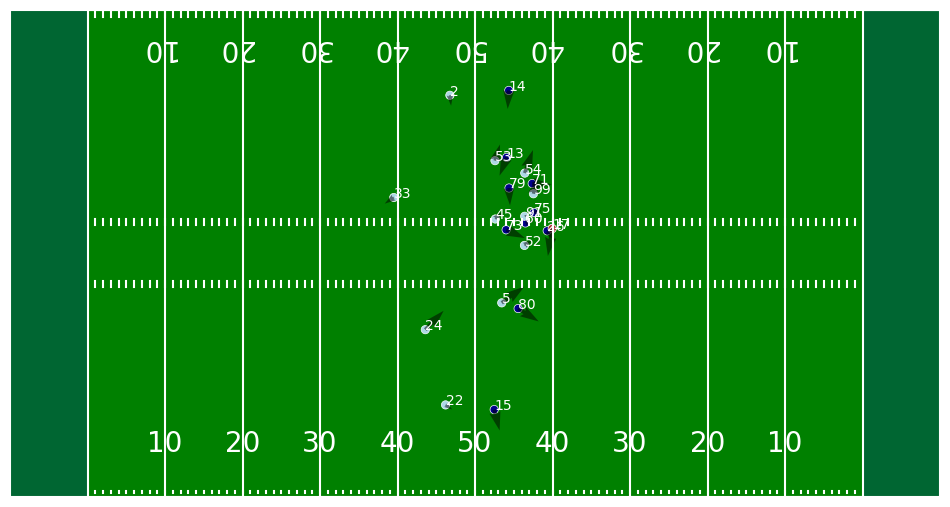

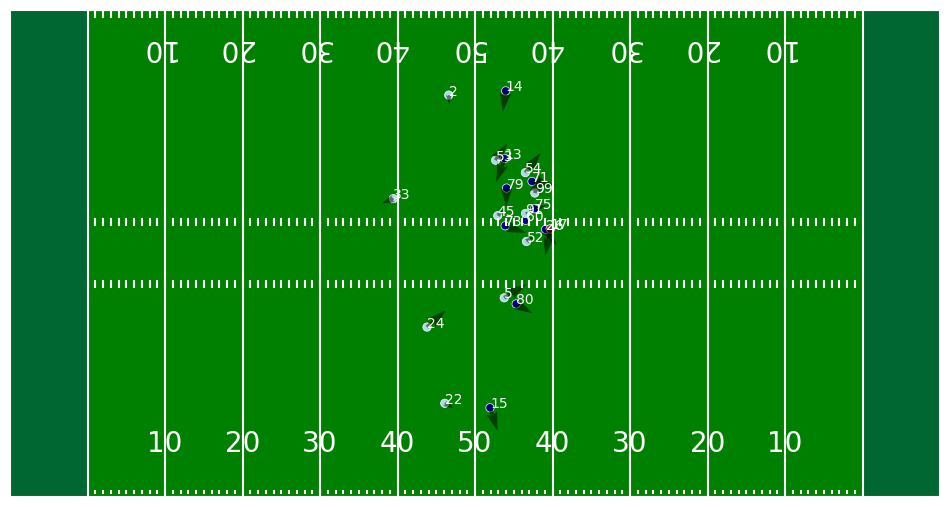

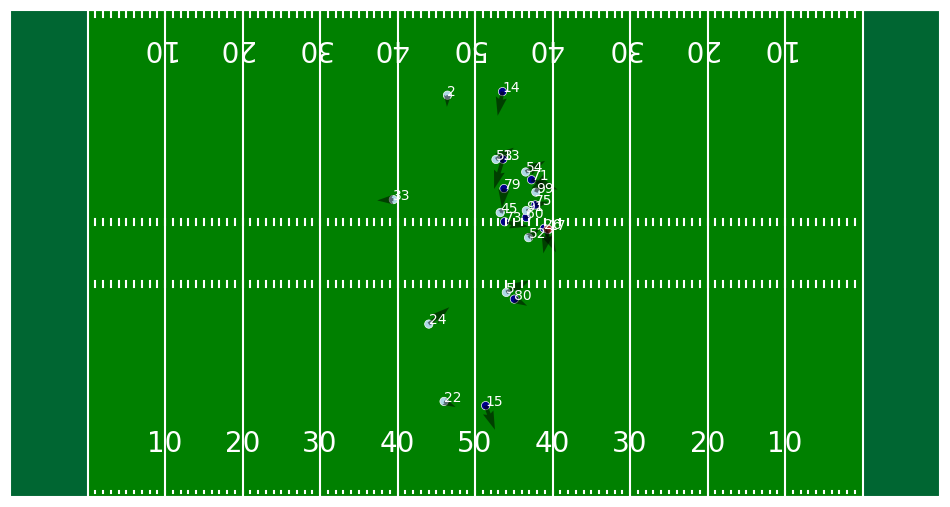

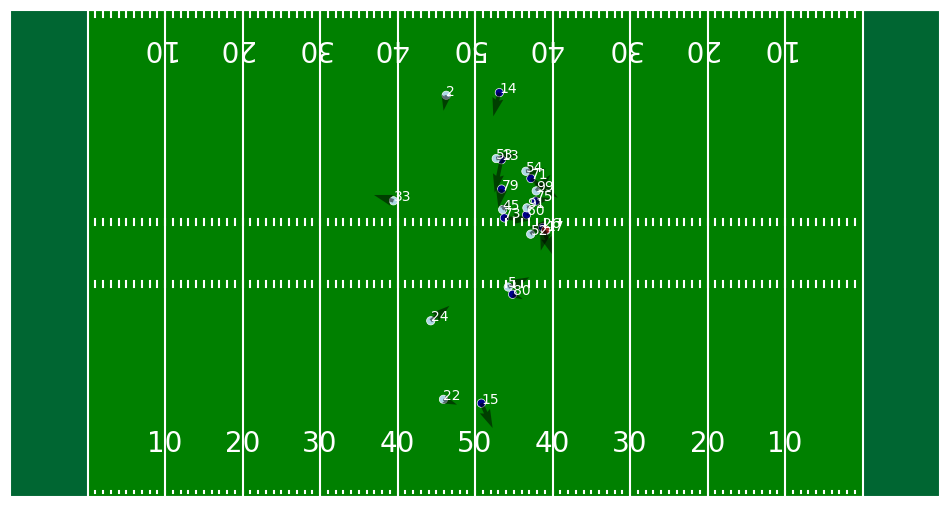

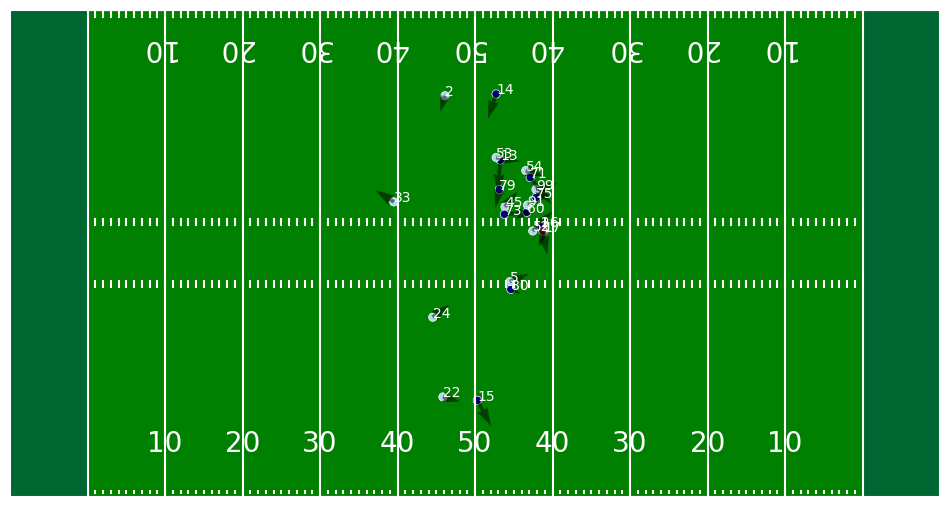

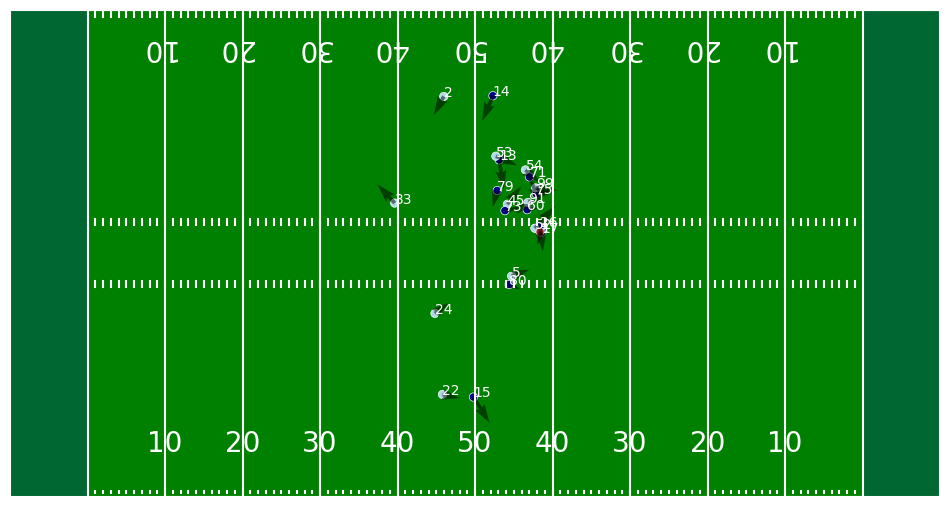

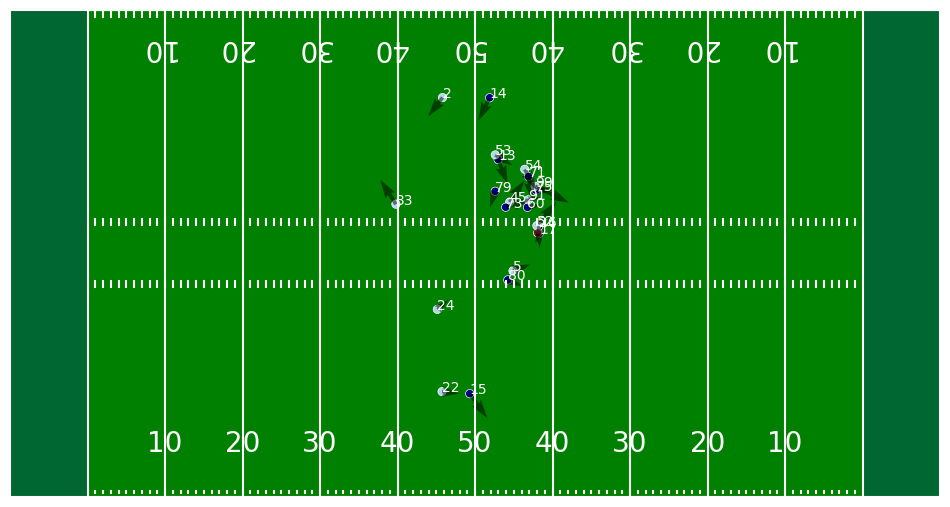

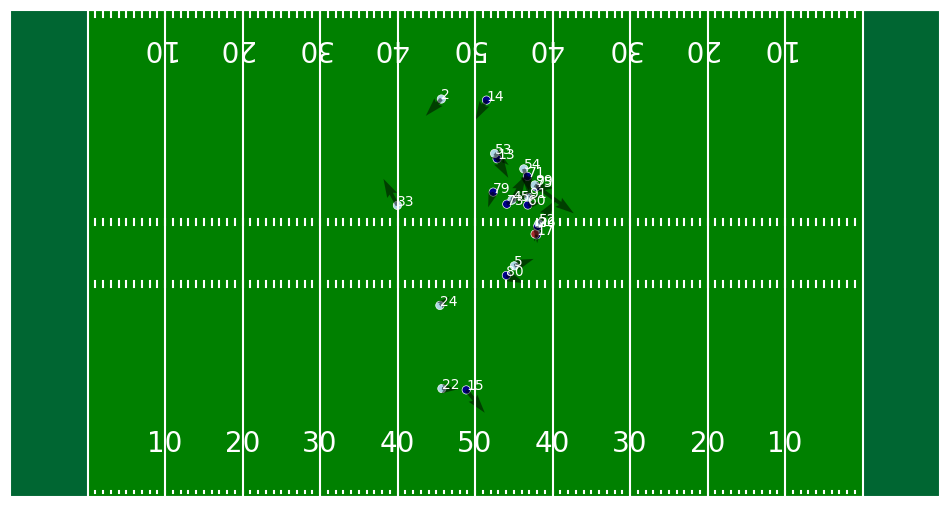

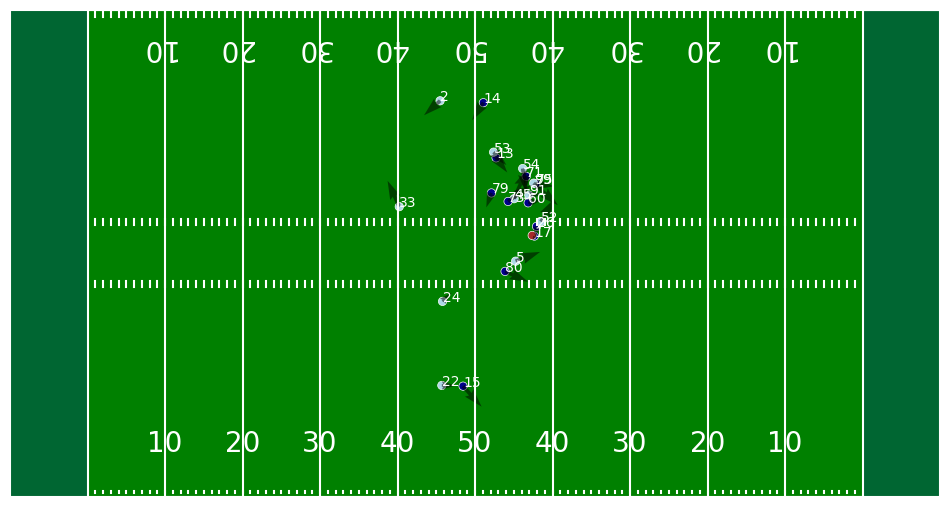

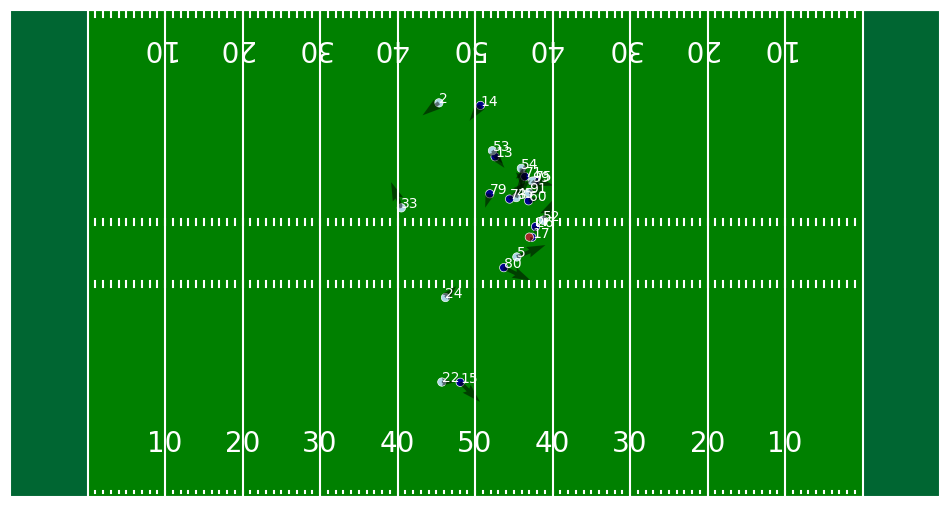

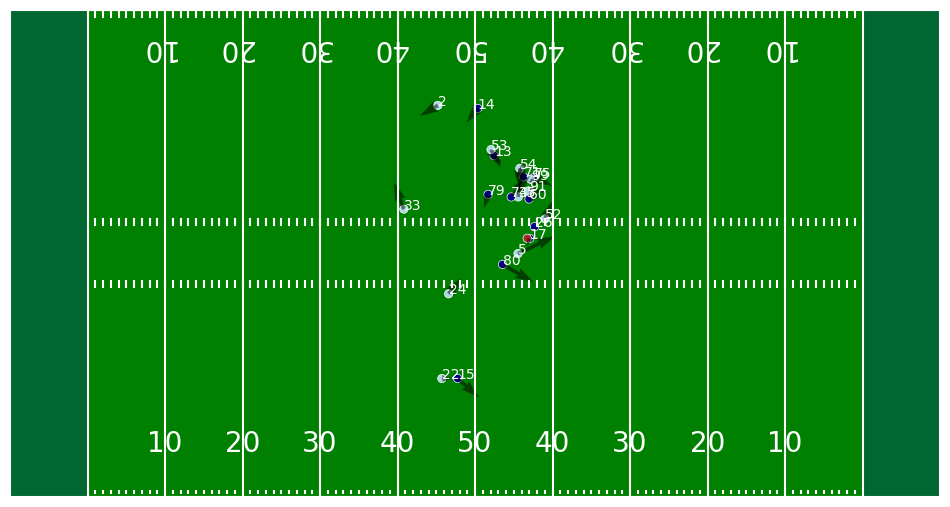

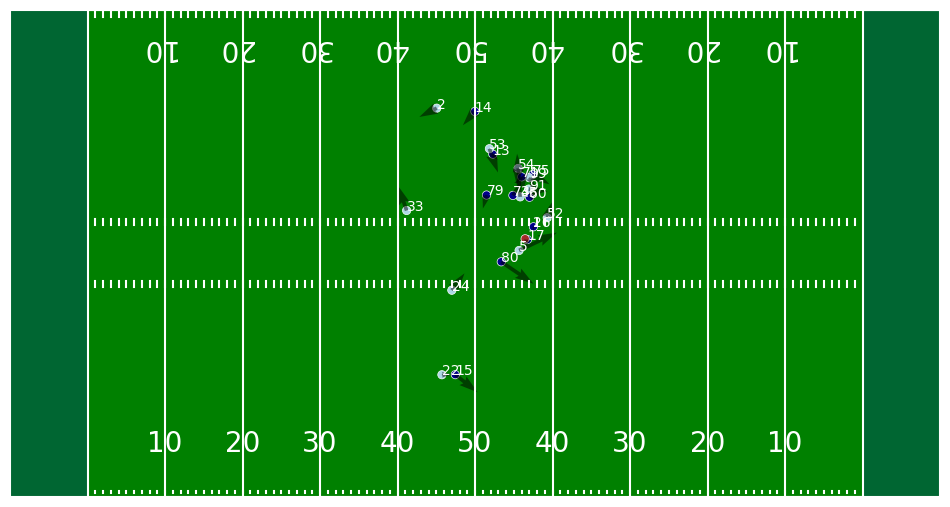

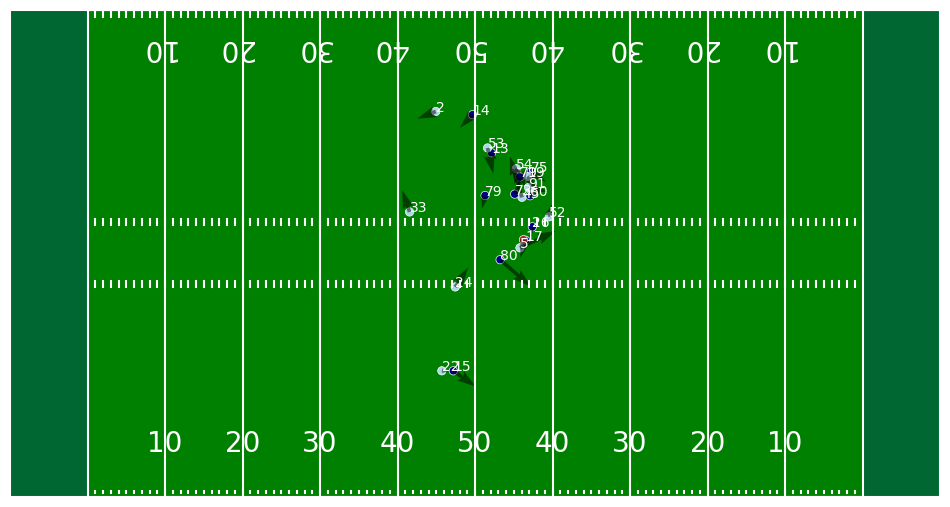

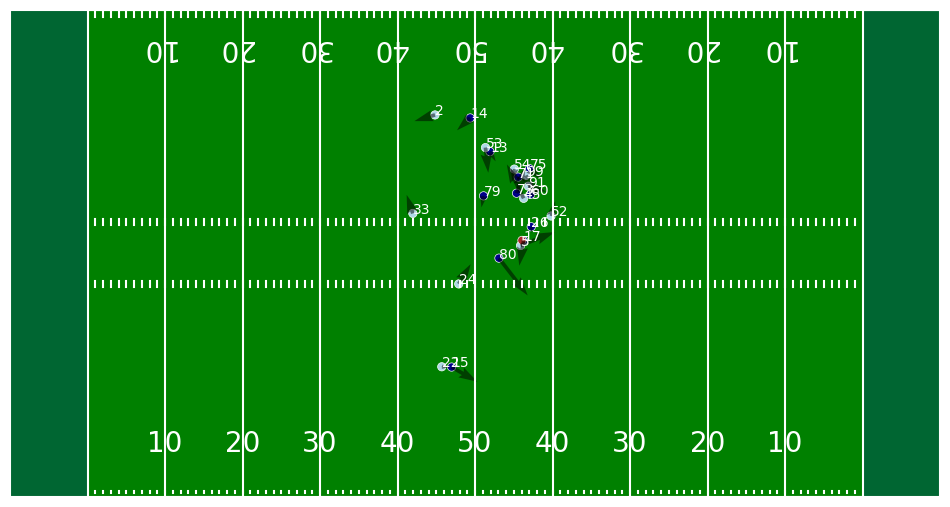

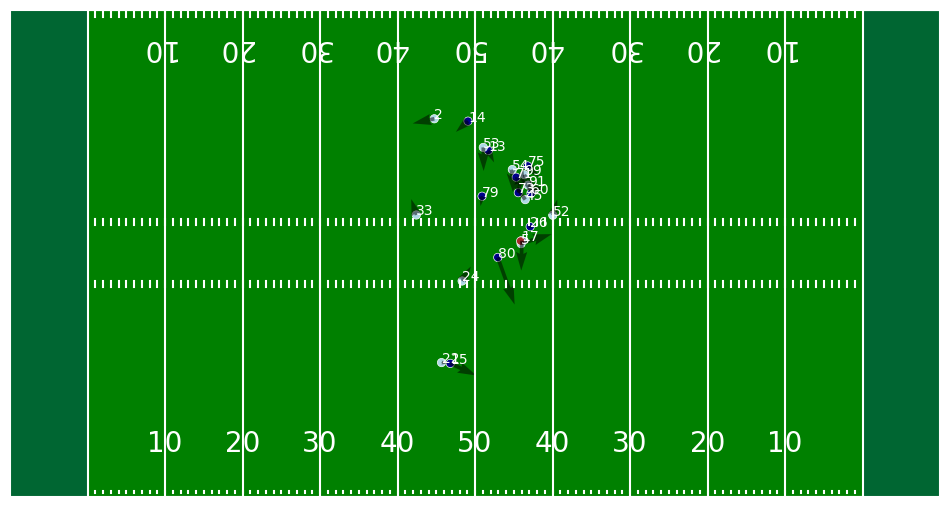

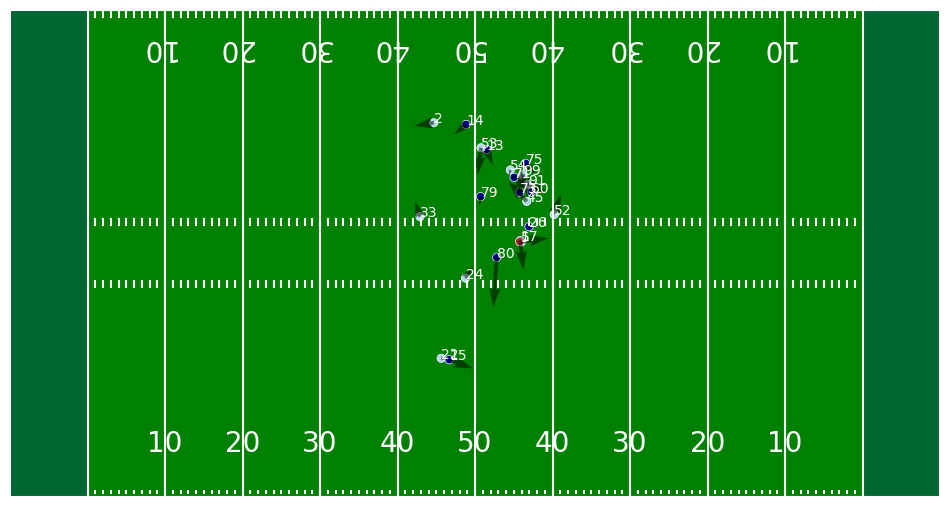

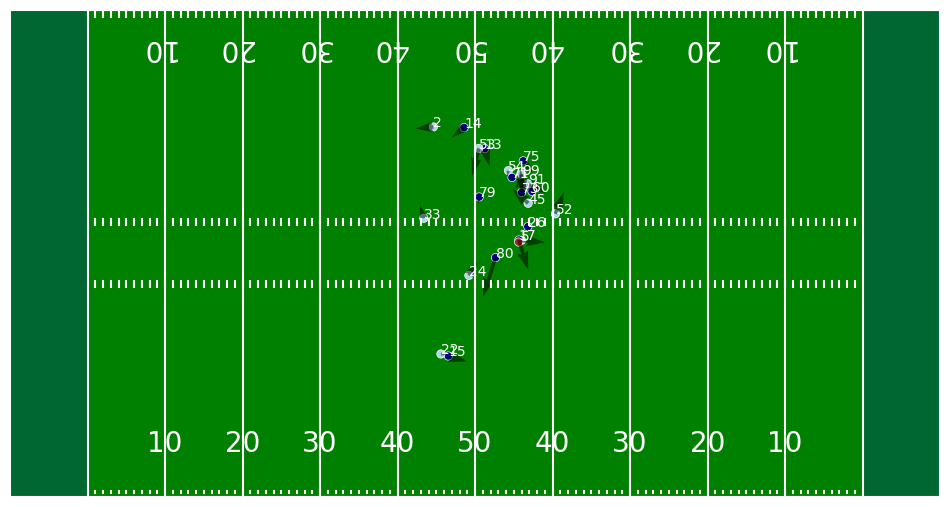

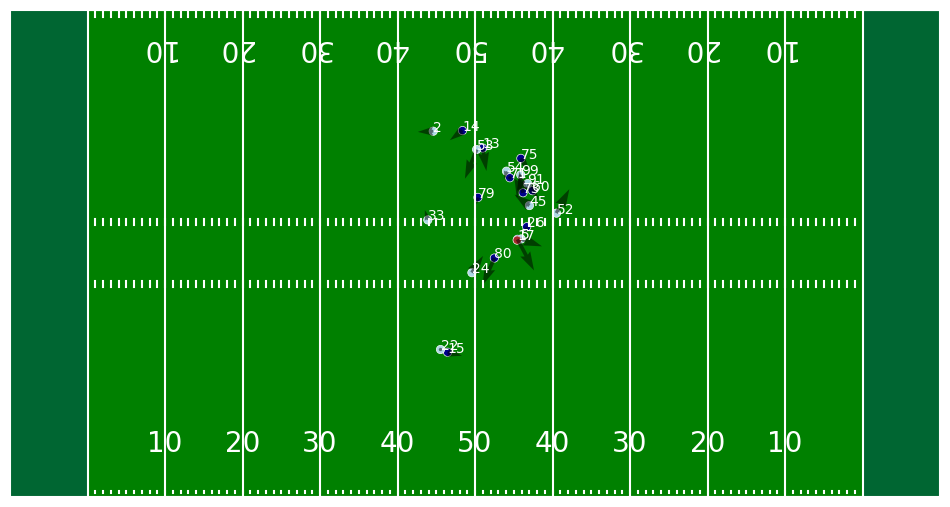

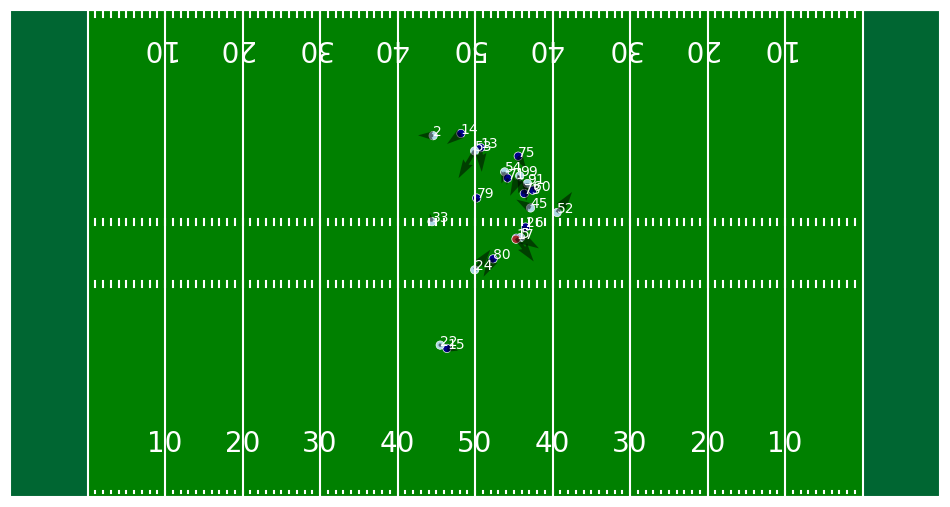

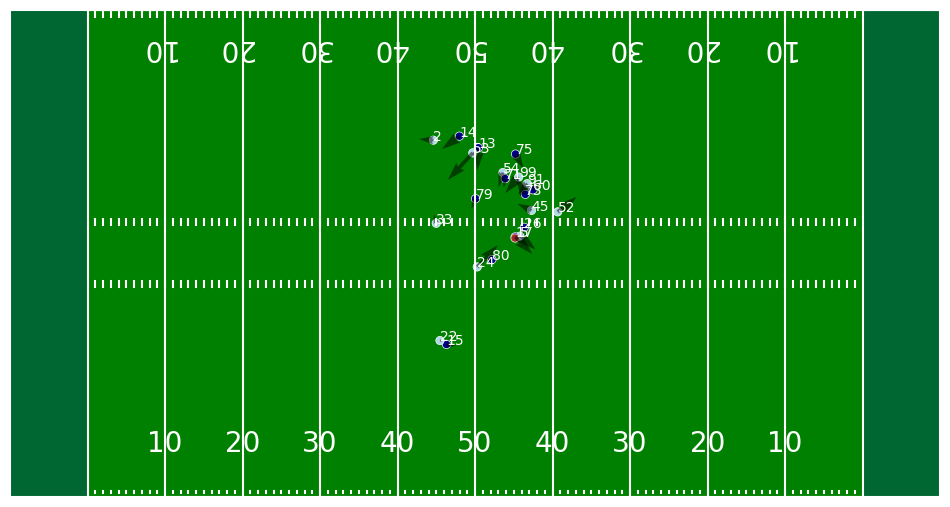

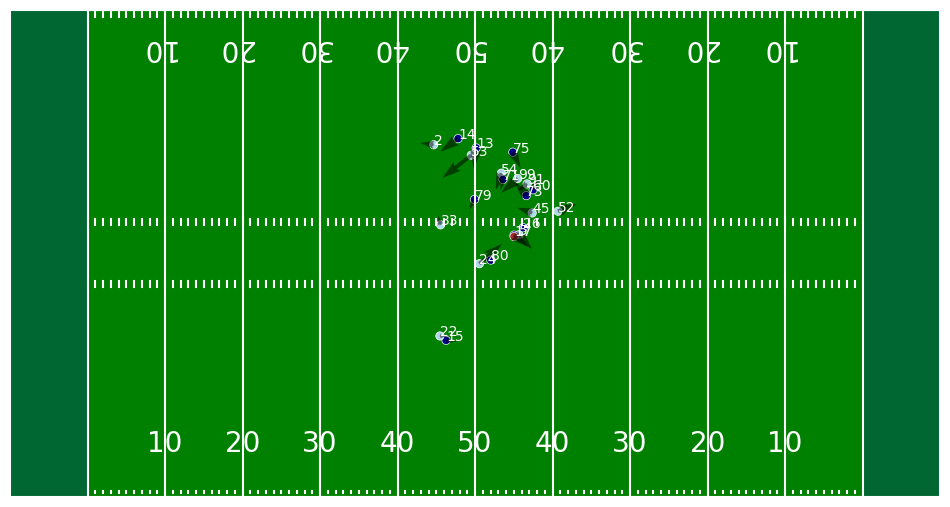

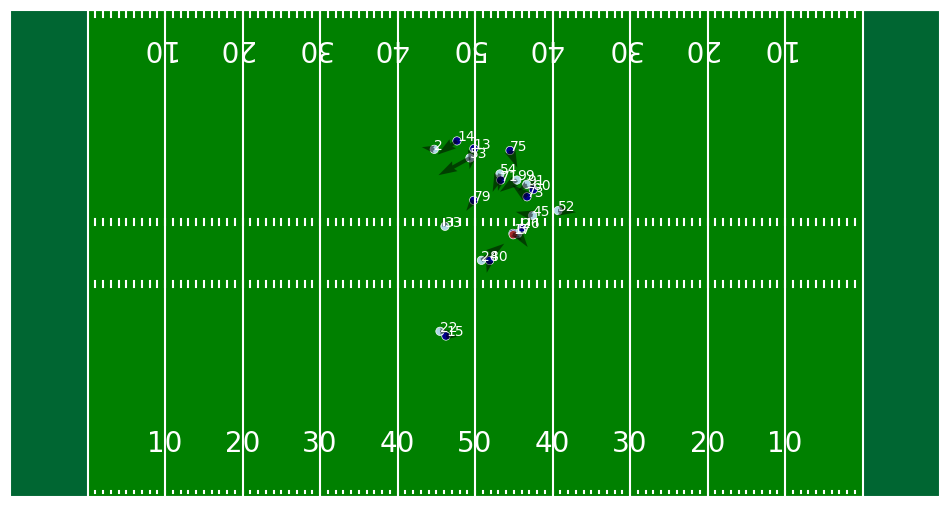

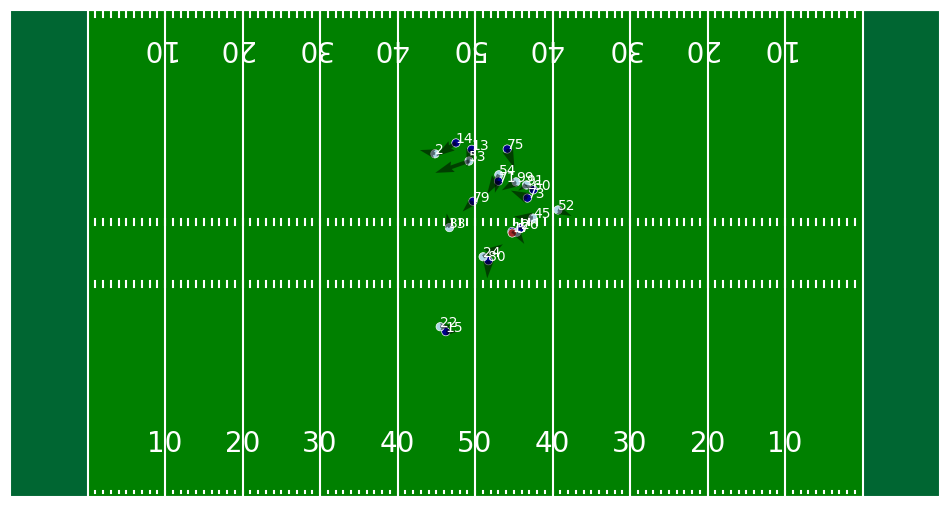

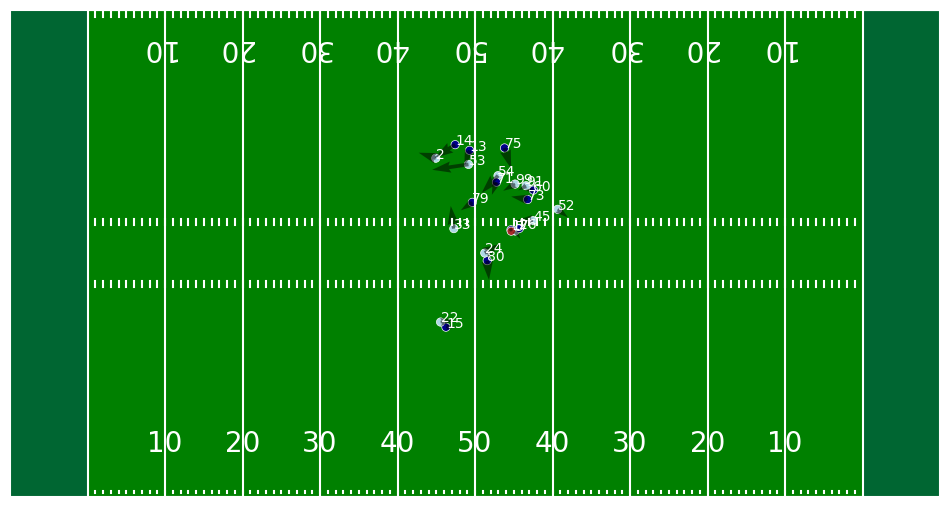

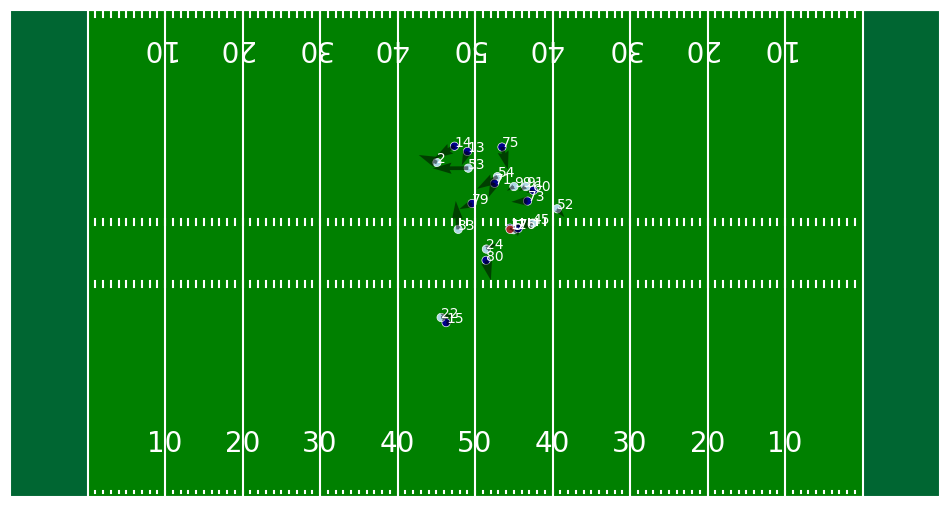

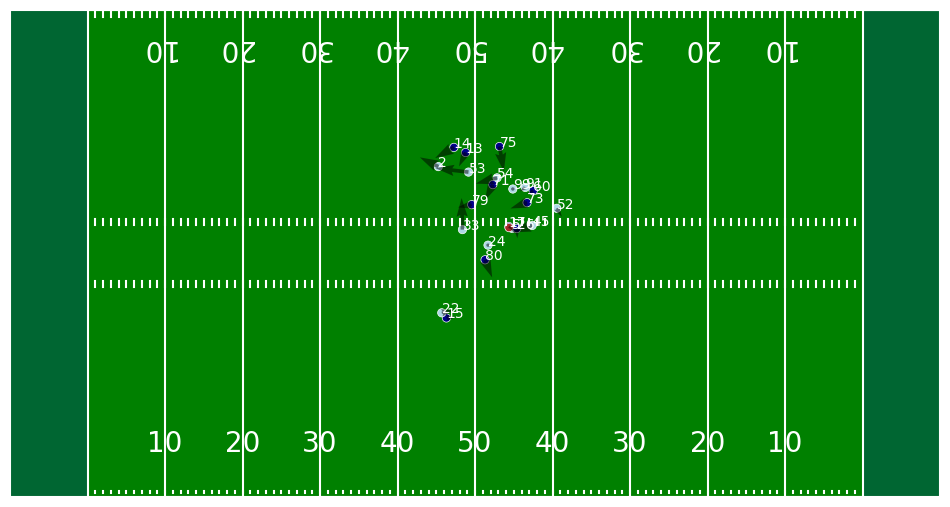

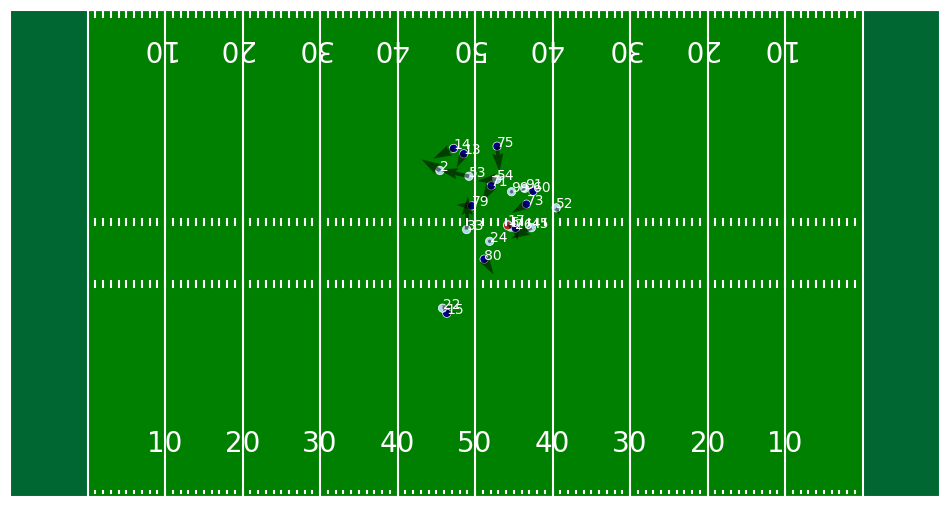

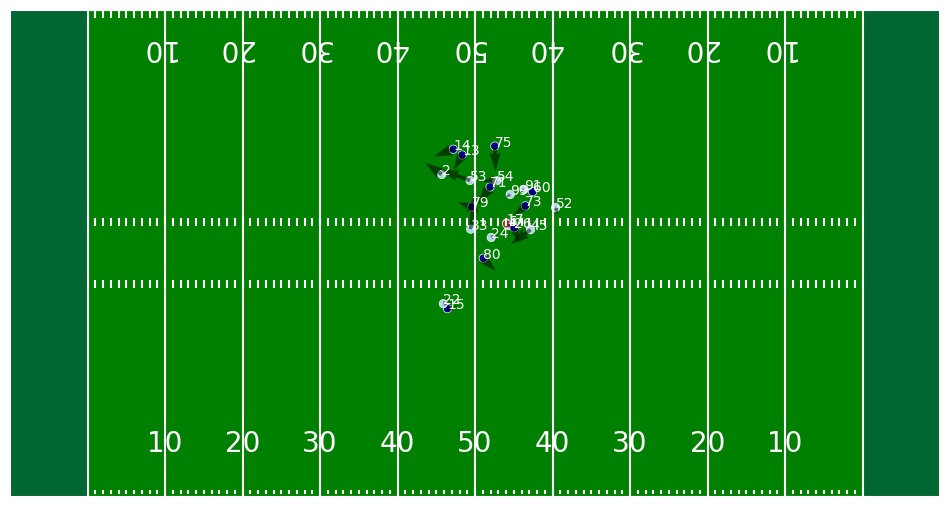

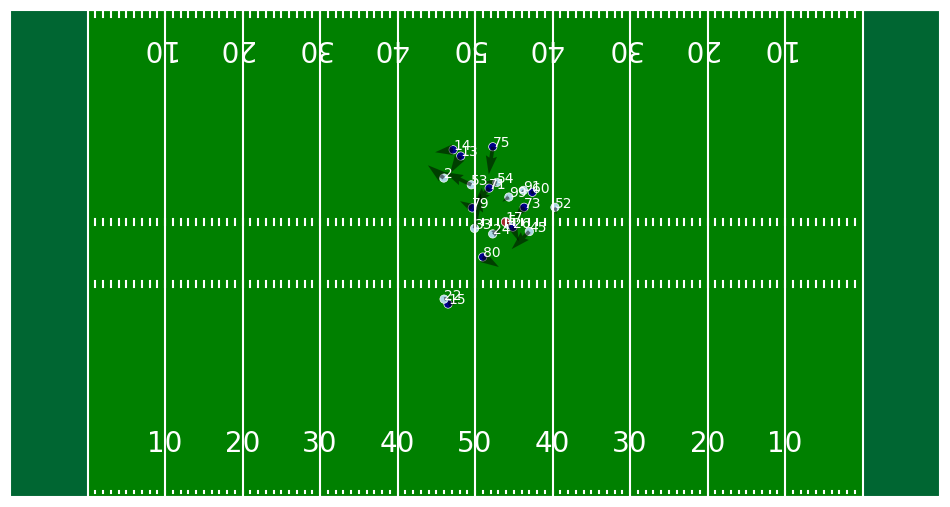

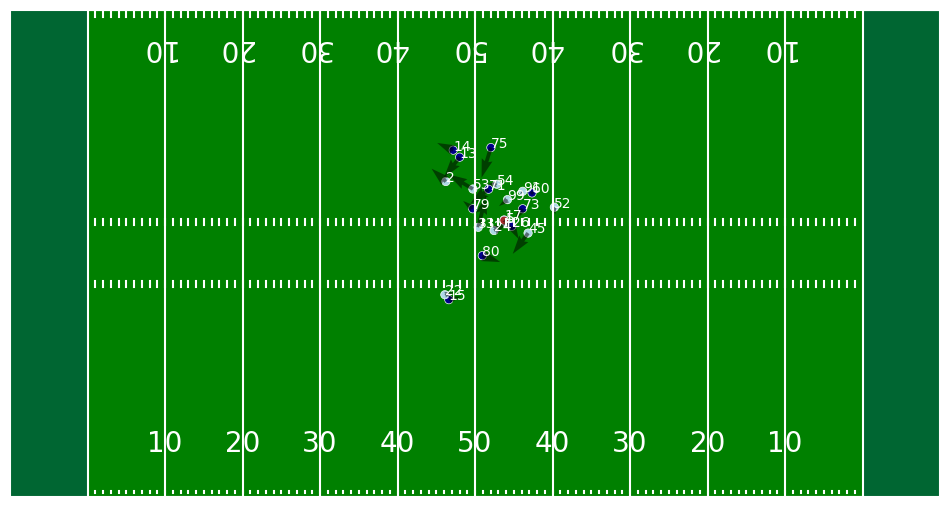

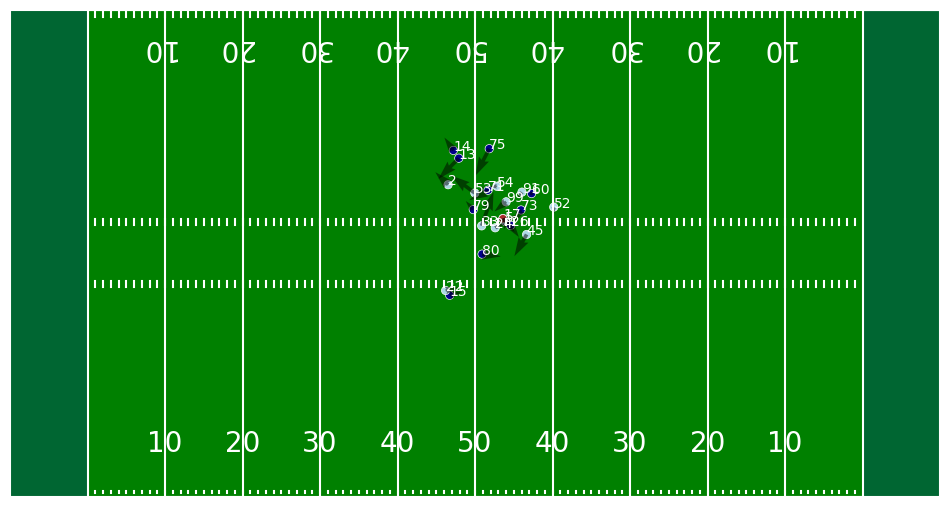

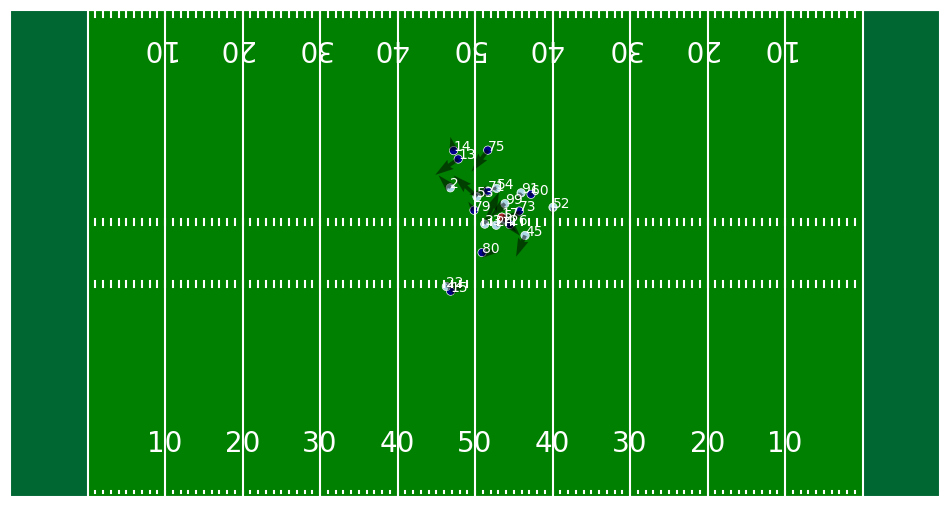

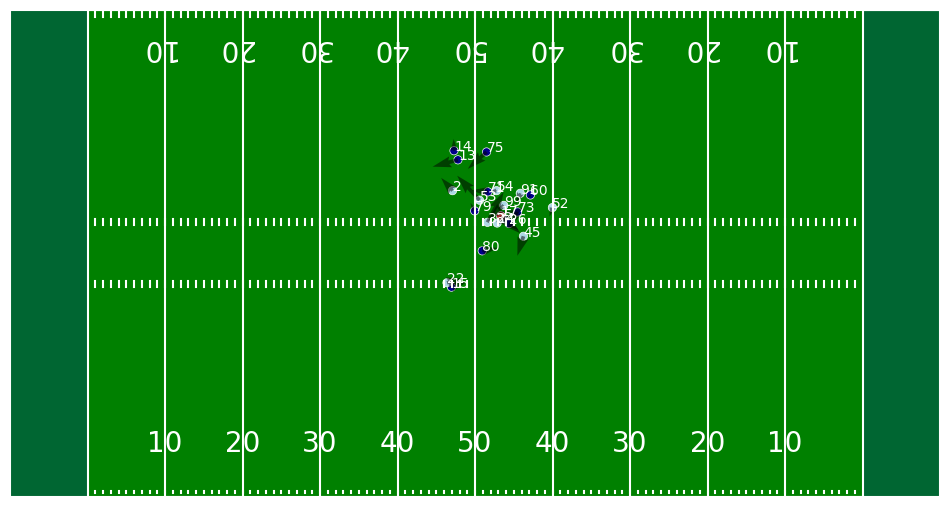

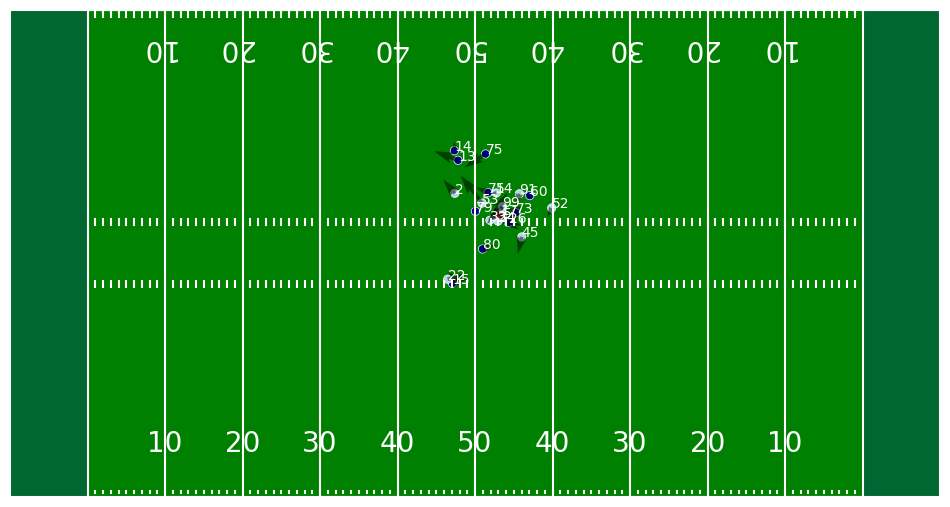

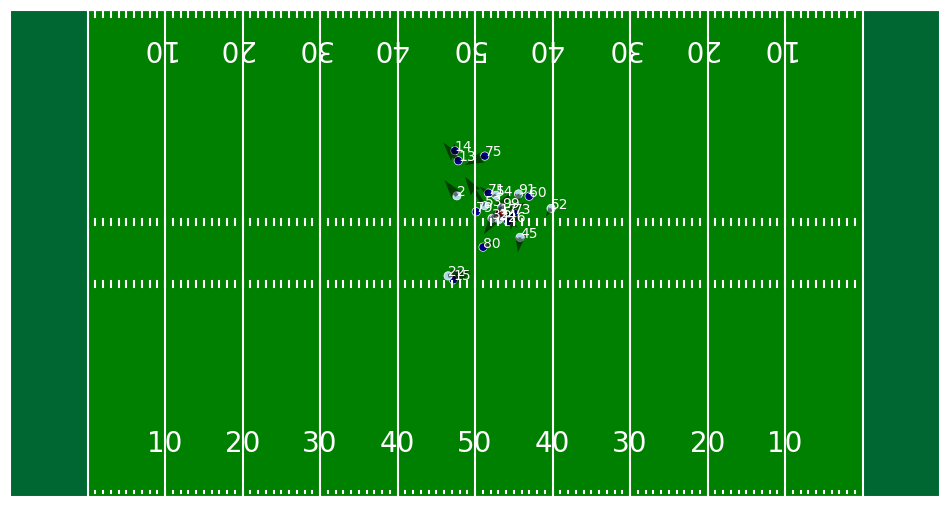

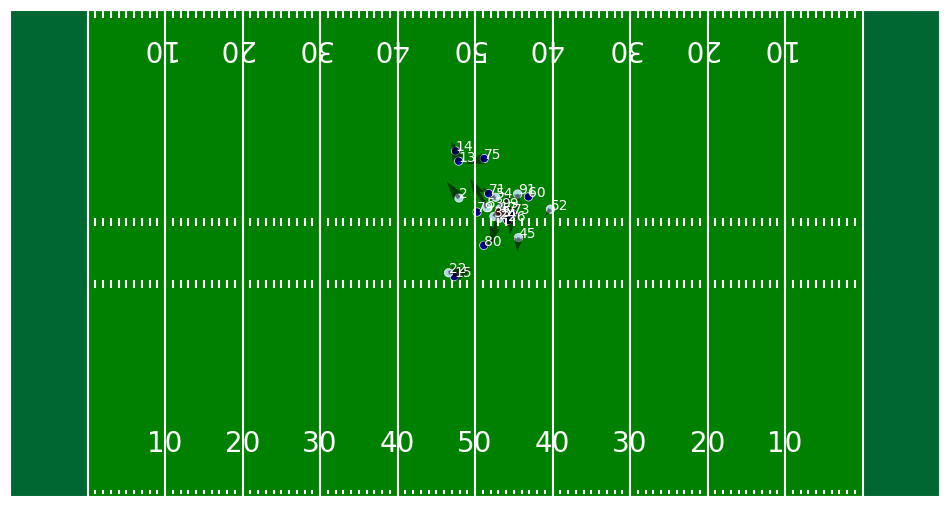

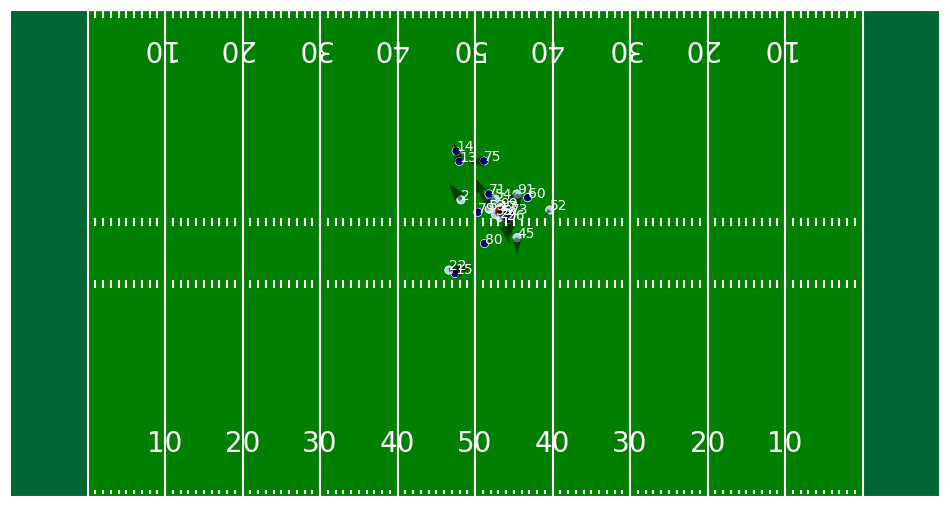

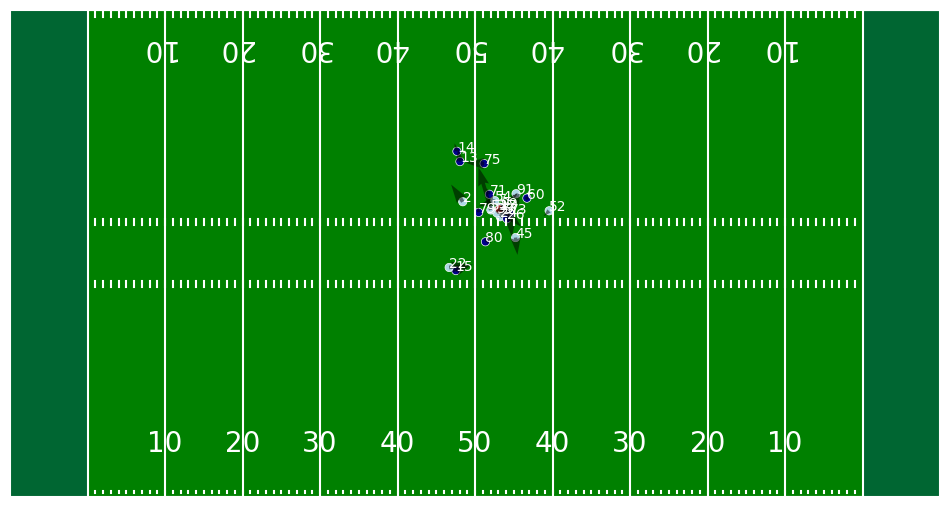

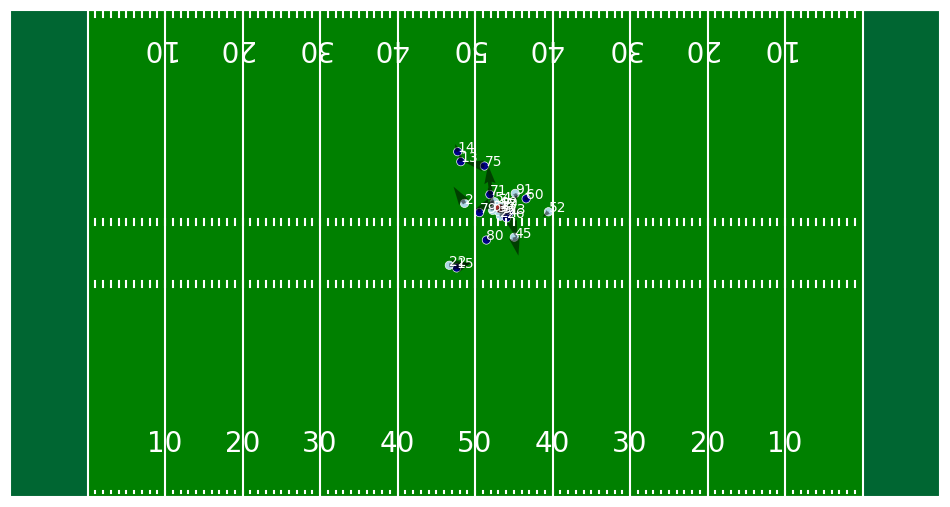

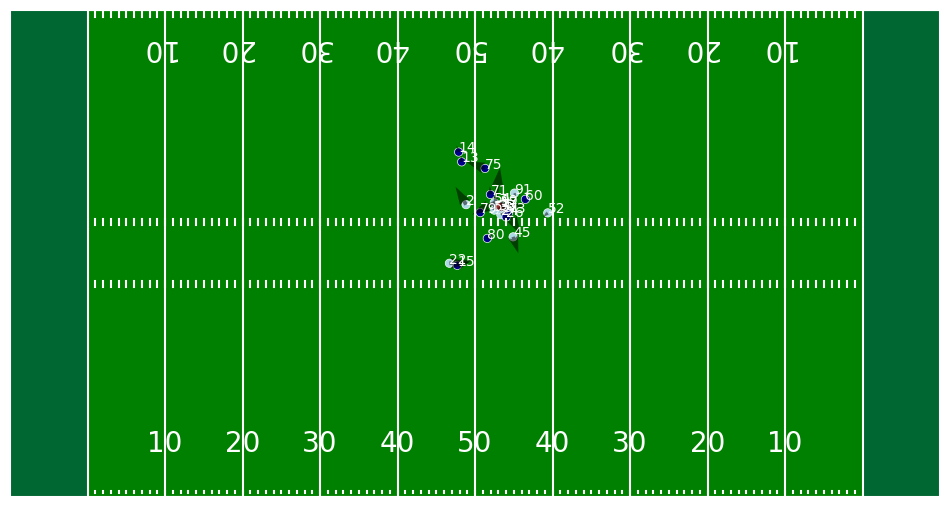

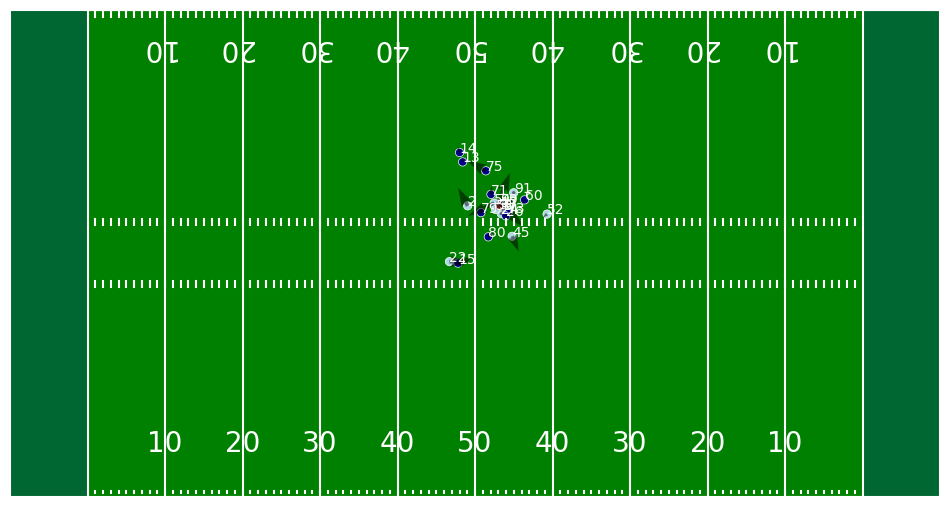

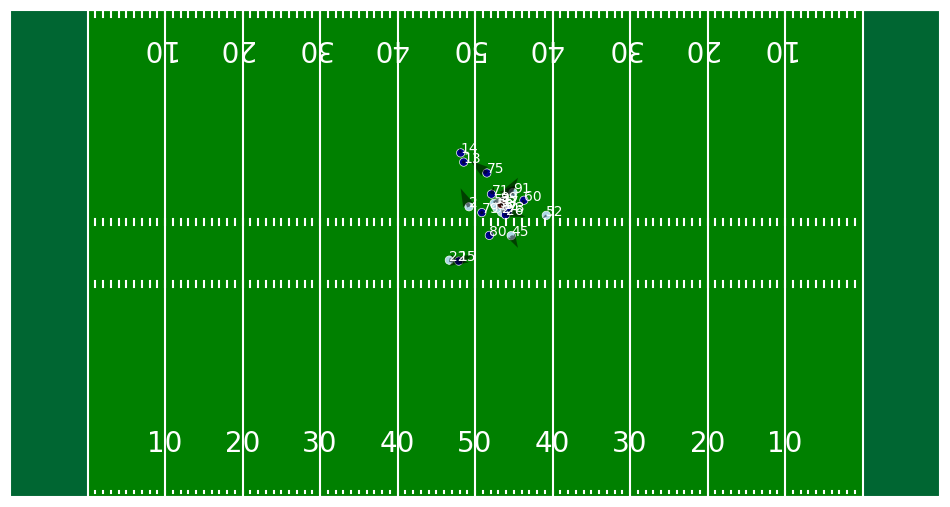

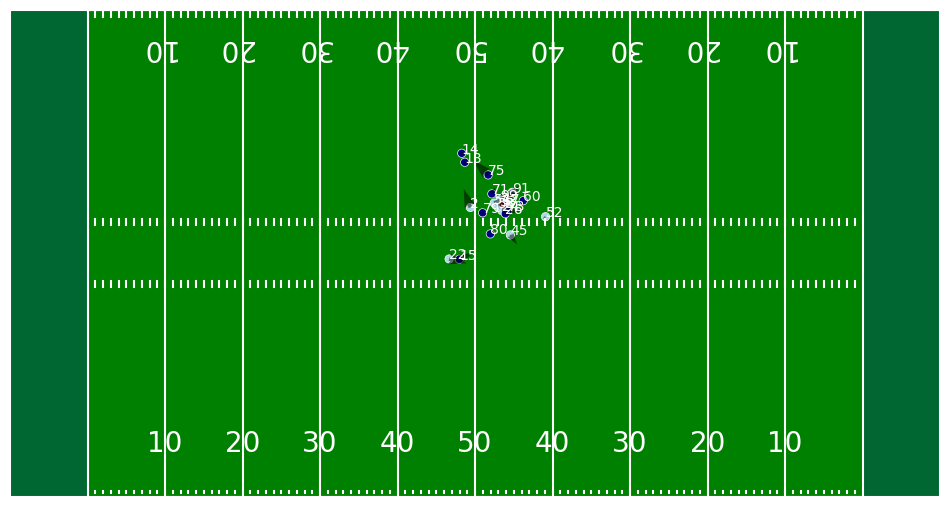

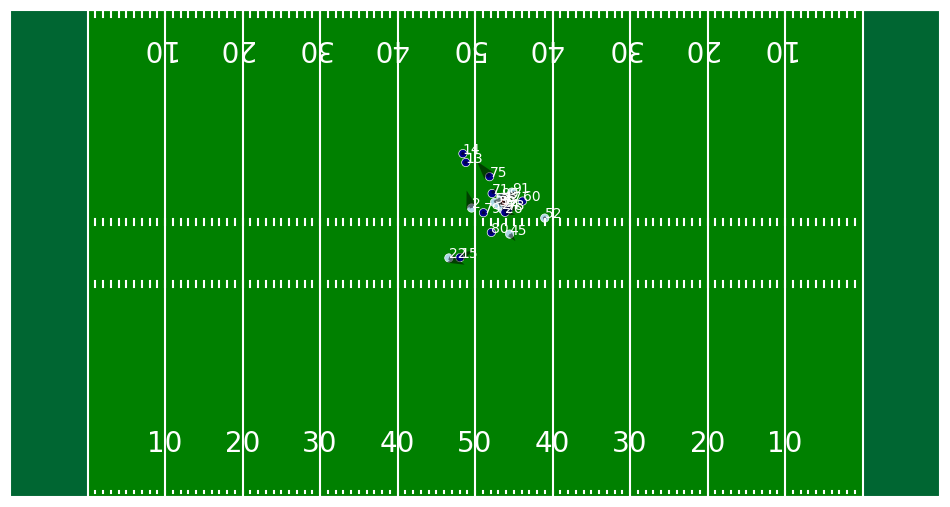

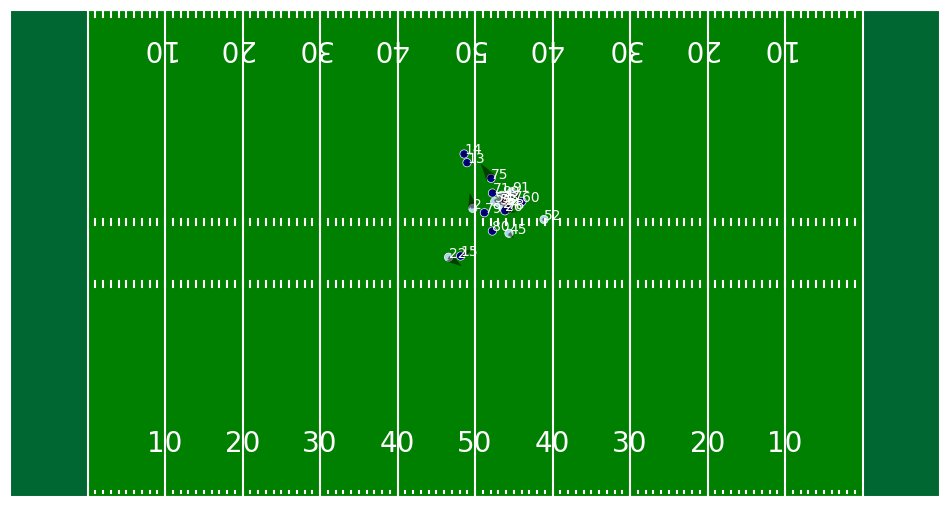

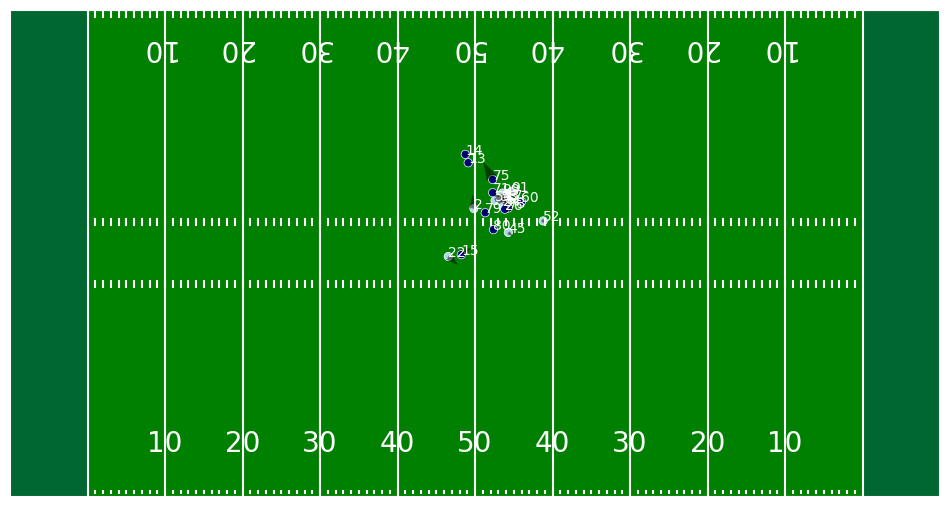

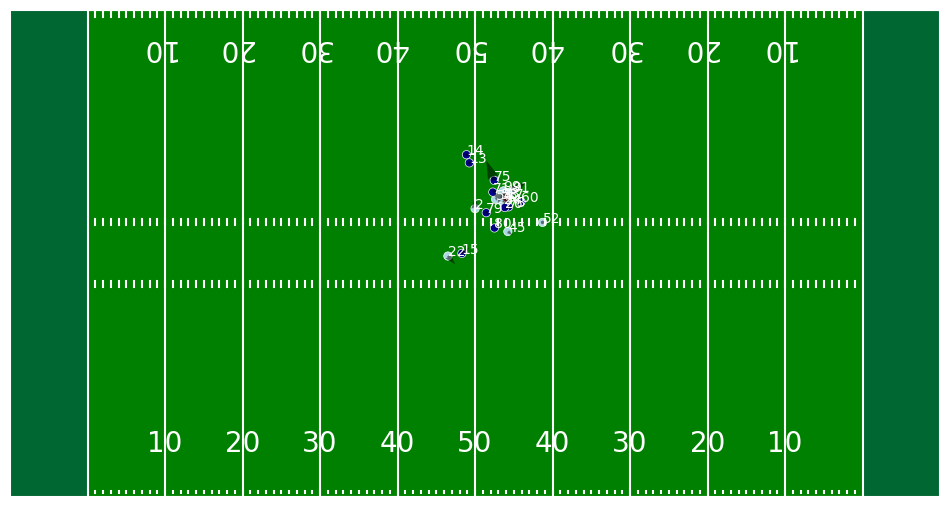

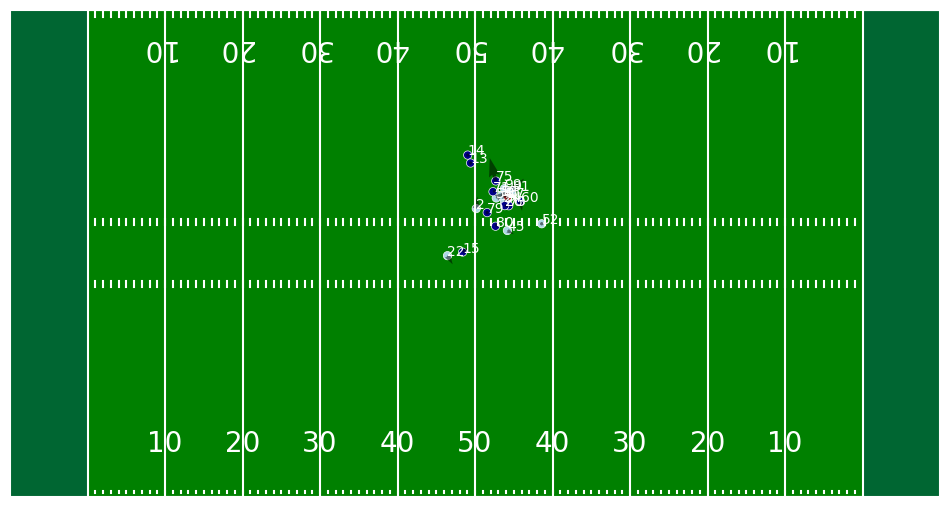

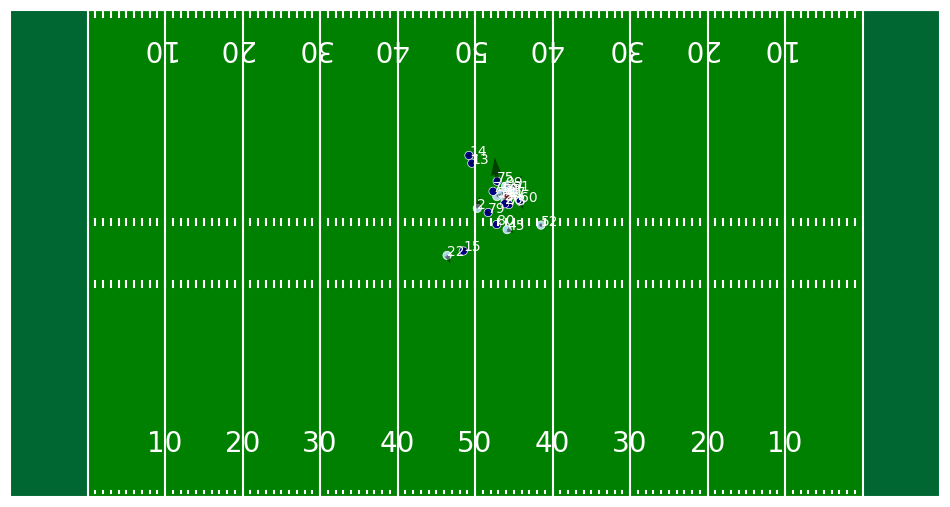

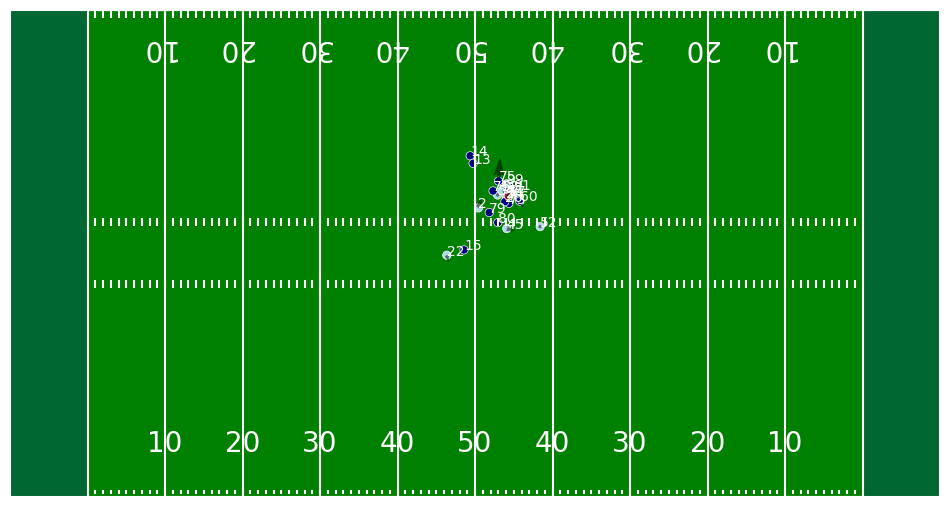

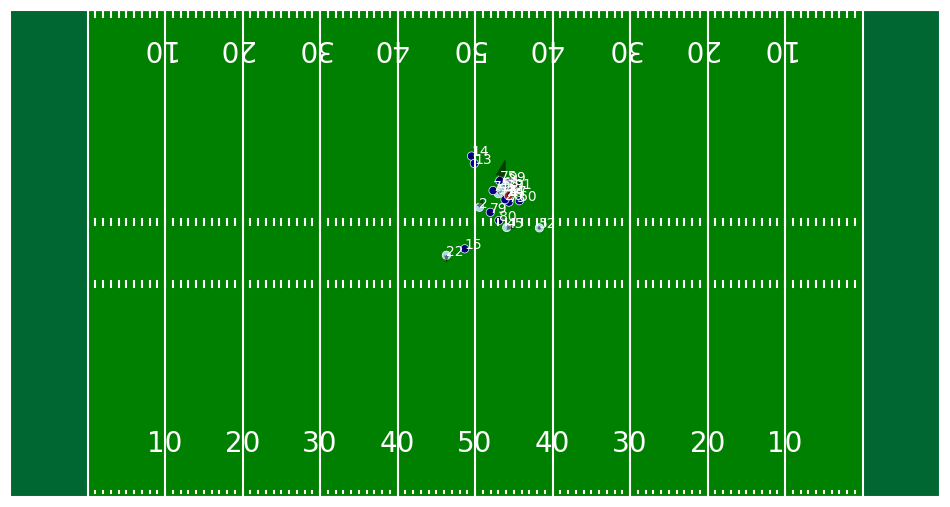

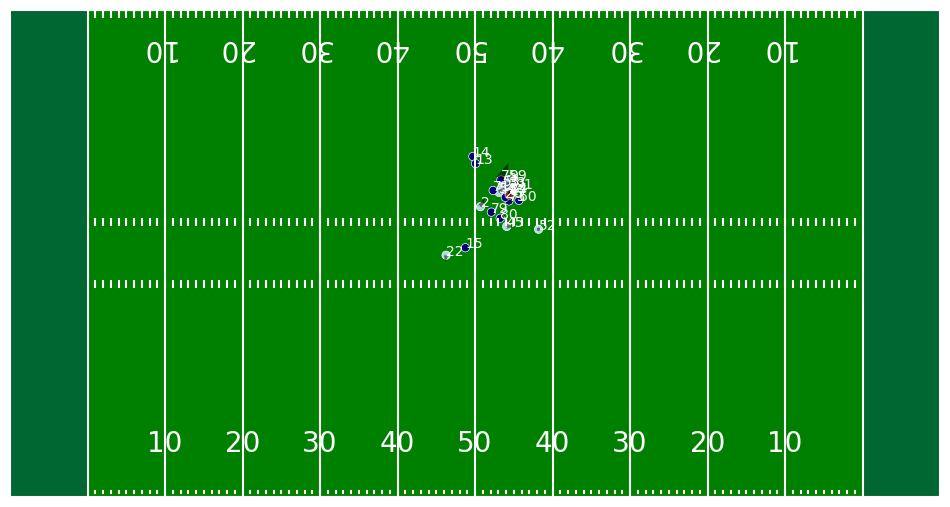

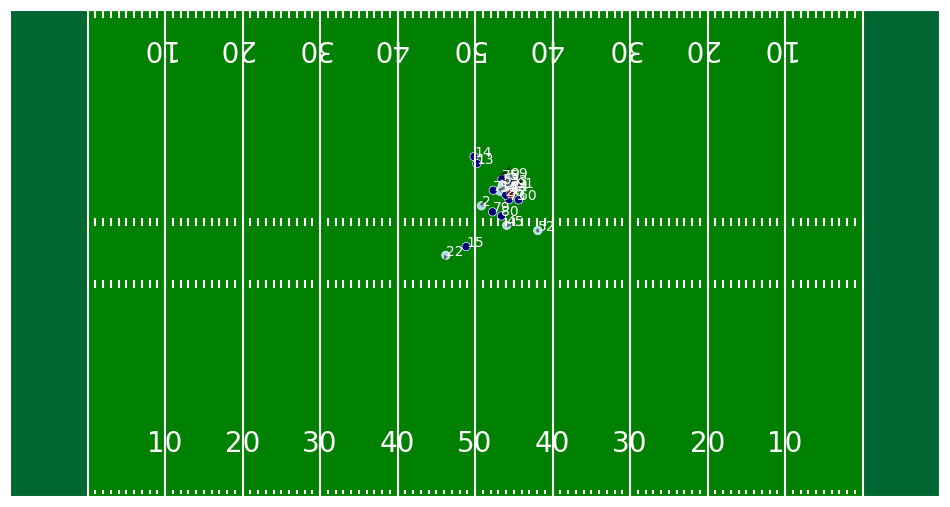

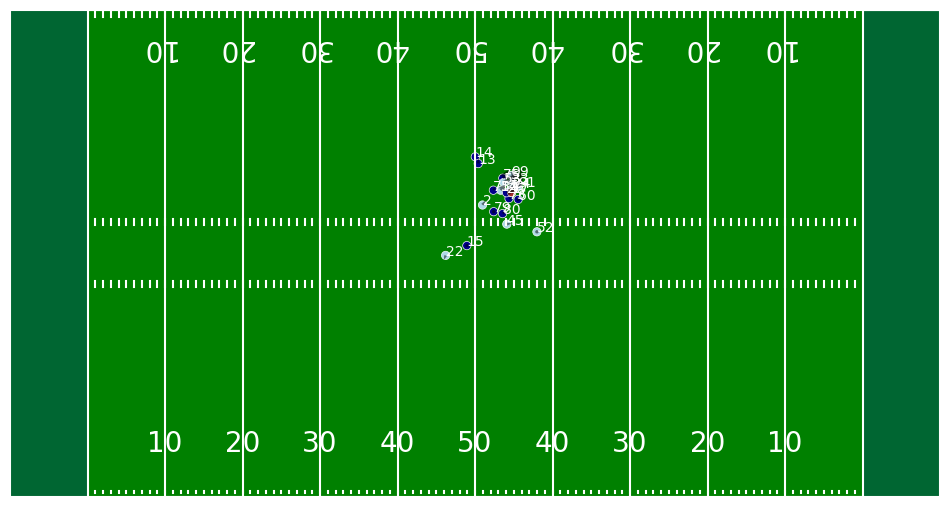

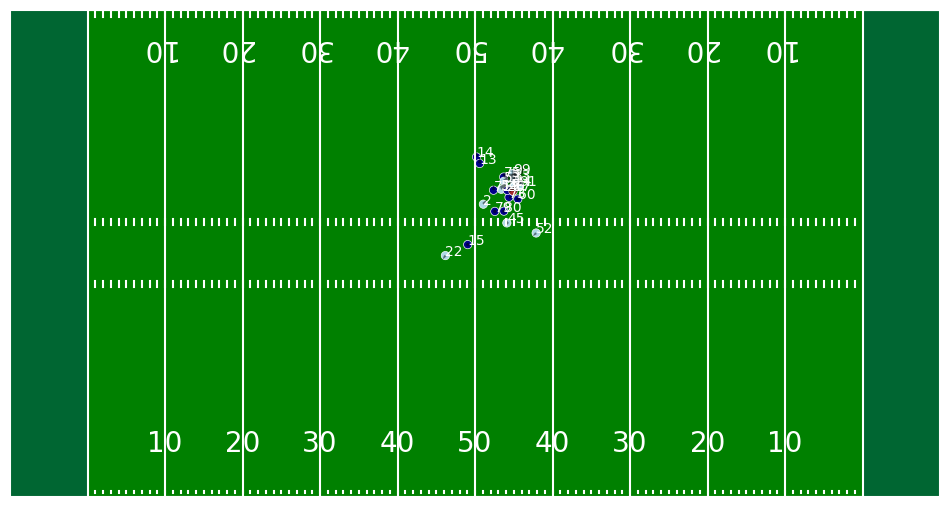

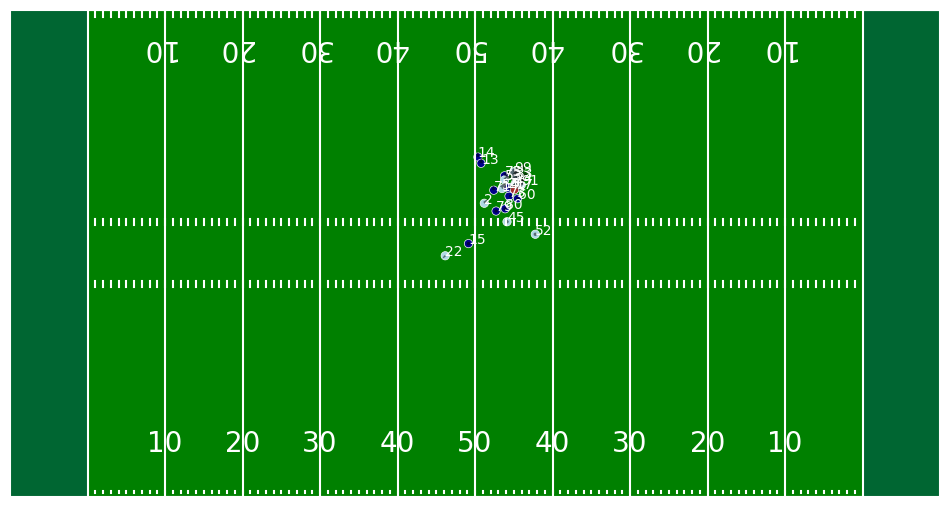

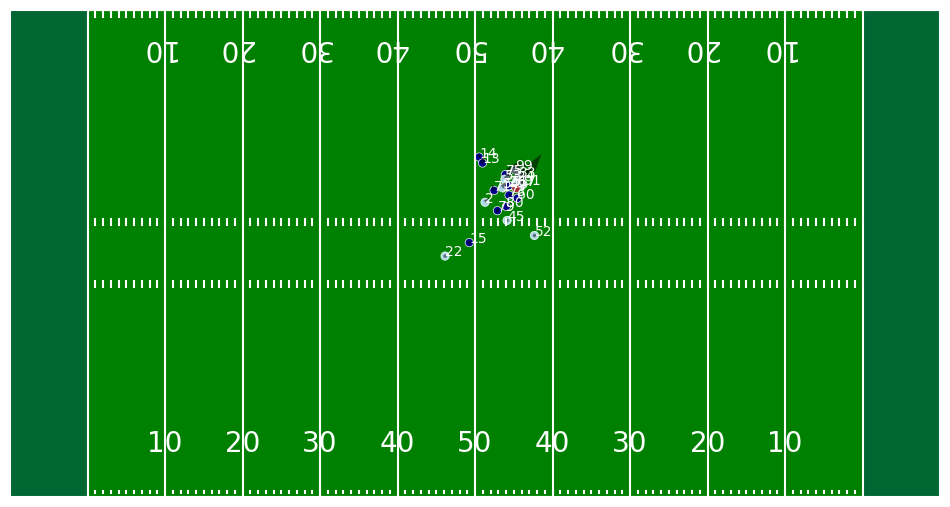

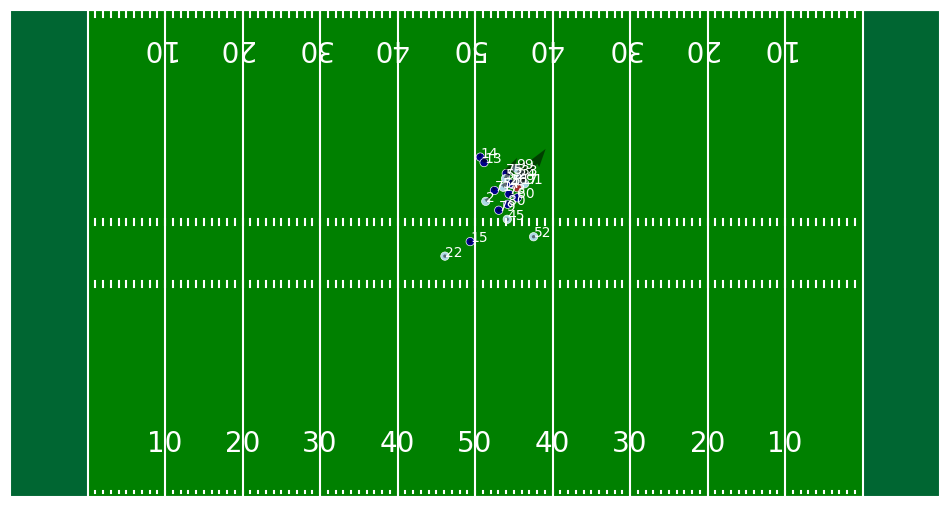

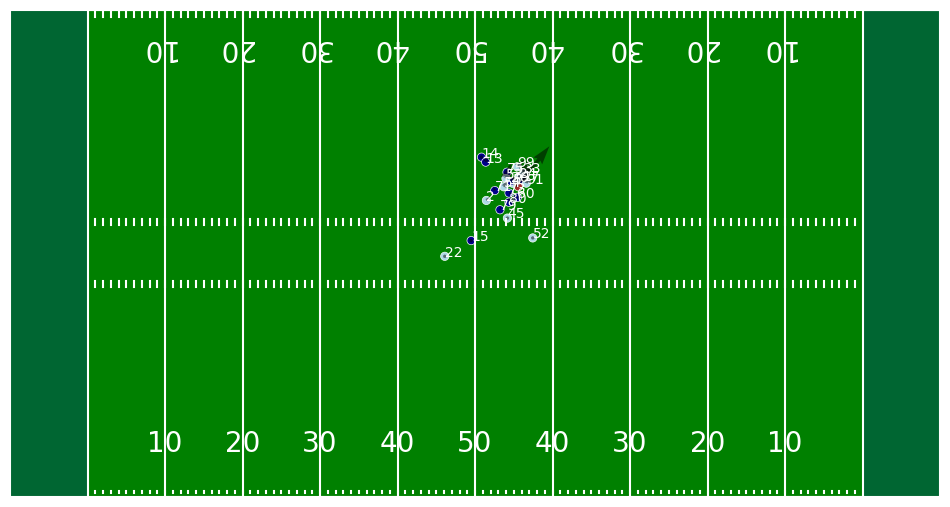

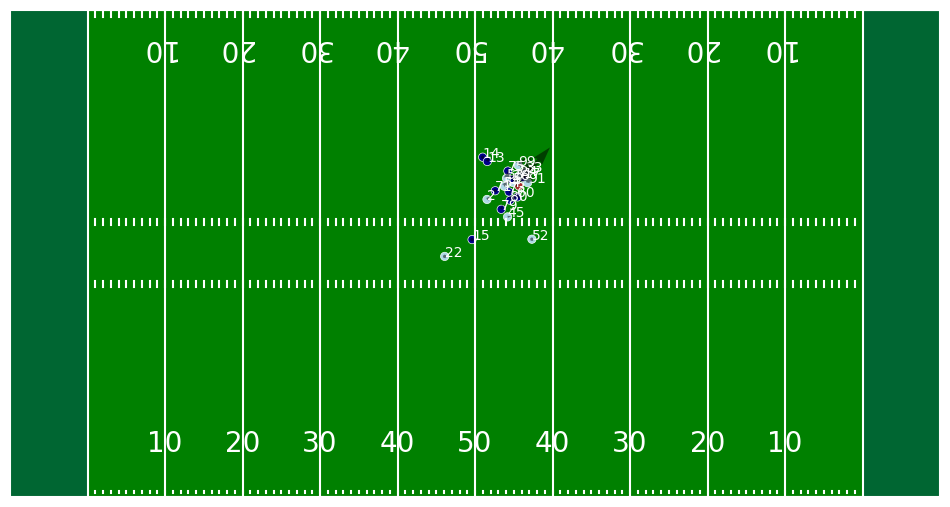

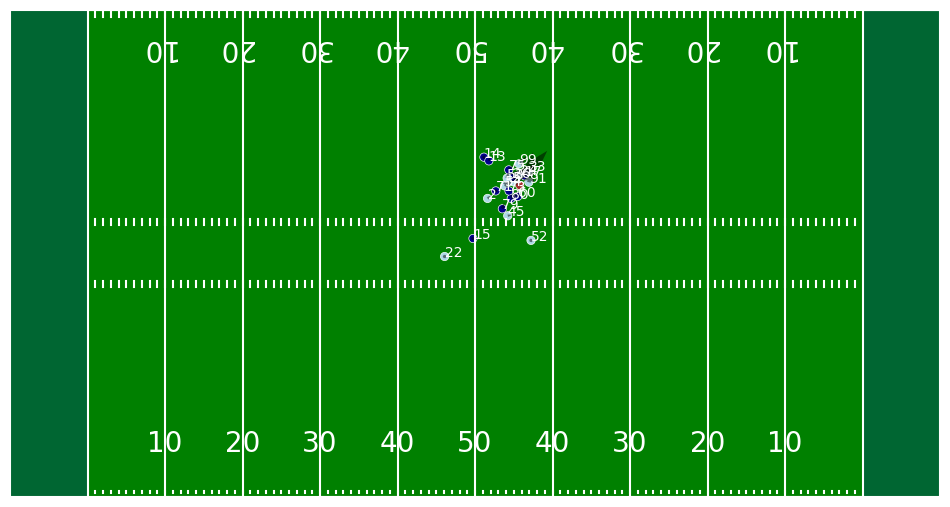

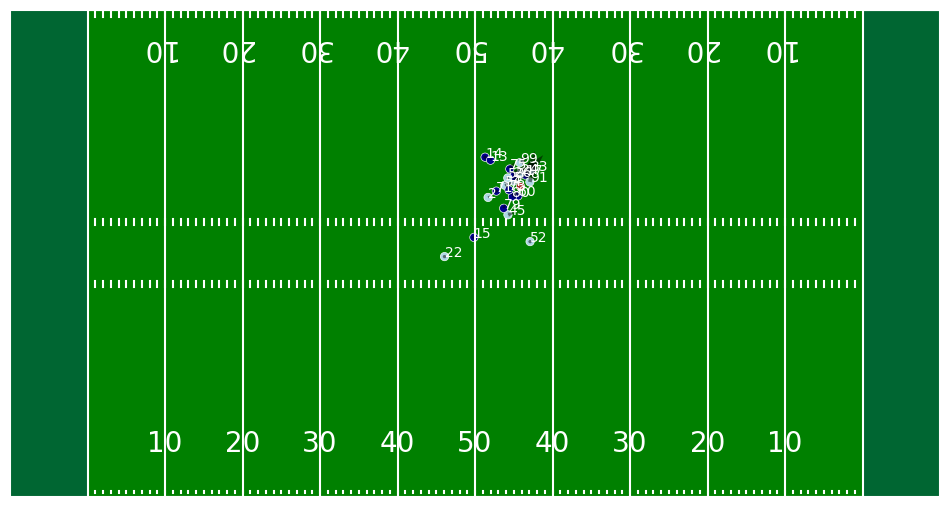

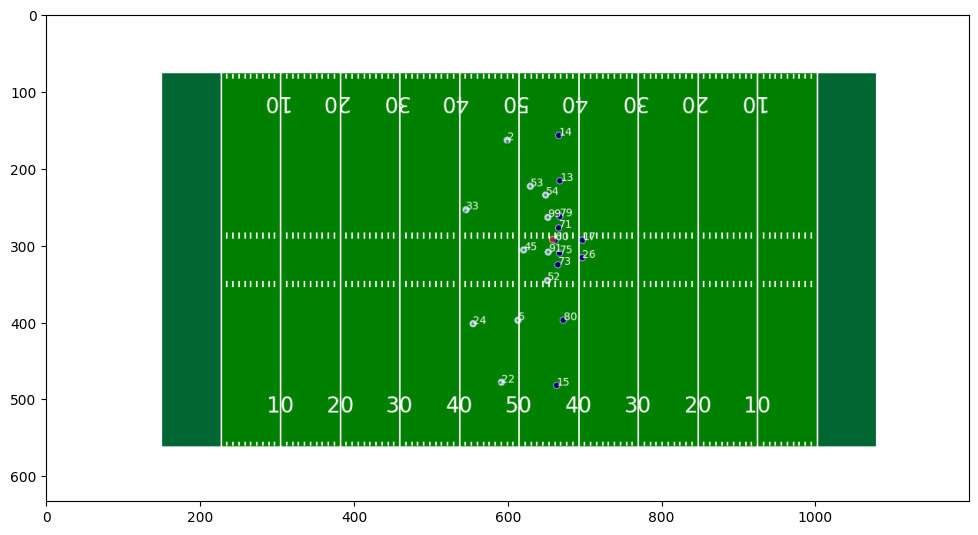

In [10]:
video = []
for i in play_1['frameId'].unique():
    #frame(i, 'o', 'dis')
    #frame(i, 'o', 's')
    #frame(i, 'o', 'a')
    #frame(i, 'dir', 'dis')
    #frame(i, 'dir', 's')
    frame(i, 'dir', 'a')
    video.append(Image.open(f'frame_{i}.png'))
fig = plt.figure(figsize=(12, 6.33))
im = plt.imshow(video[0])
def animate_func(i):
    im.set_array(video[i])
    return [im]
anim = animation.FuncAnimation(fig, animate_func, frames = len(video), interval = 1000 // 12)
#plt.show()
anim.save('dir_a.mp4')